### Import Python libraries

In [83]:
import os
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

### Import data

In [84]:
path_data = "C:\\OneDrive - Netherlands eScience Center\\Lessons\\data-science-introduction\\data"
data = pd.read_excel(os.path.join(path_data, "CompanyComplaints01.xlsx"), sheet_name="Data semi anonymous")

### Data conversions

In [85]:
projects_list = [re.split(",|, ", x.replace("]","").replace("[","").replace("'","").replace(" ","")) for x in data["Projects"]]

# Replace column string values by lists
data["Projects"] = projects_list

### Collect unique values

In [86]:
# Get unique entries
age_all = set(x for x in data["Age"])
print("Unique Age entries:", sorted(age_all))

projects_all = set(x for l in data["Projects"] for x in l)
print("Unique projects:", sorted(projects_all))

IDs_all = data["ID"].values
print("Unique IDs:", IDs_all)

Unique Age entries: ['20-29', '30-39', '40-49', '>50', 'not provided']
Unique projects: ['', 'projectA', 'projectB', 'projectC', 'projectD', 'projectE', 'projectF', 'projectG', 'projectH', 'projectK', 'projectM', 'projectN', 'projectX', 'projectY', 'projectZ']
Unique IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [87]:
data.head(10)

,ID,Age,Gender,Joined years ago,Projects,Rate working at AtoZ,Rate project quality
0,1,20-29,male,1-3,[projectF],8,7
1,2,20-29,female,1-3,"[projectA, projectD]",4,7
2,3,30-39,not provided,4-8,"[projectD, projectH]",9,6
3,4,30-39,male,1-3,"[projectA, projectC]",5,8
4,5,not provided,female,>8,"[projectD, projectF, projectG]",8,9
5,6,>50,male,>8,"[projectA, projectB, projectC, projectE, proje...",10,10
6,7,40-49,not provided,4-8,"[projectB, projectC, projectH]",9,8
7,8,30-39,male,1-3,"[projectY, projectZ]",8,7
8,9,30-39,male,1-3,"[projectD, projectE, projectF]",8,8
9,10,20-29,male,4-8,"[projectB, projectF, projectH]",8,6


## First: The simple answers

[None, None, None, None]

<Figure size 1800x1200 with 0 Axes>

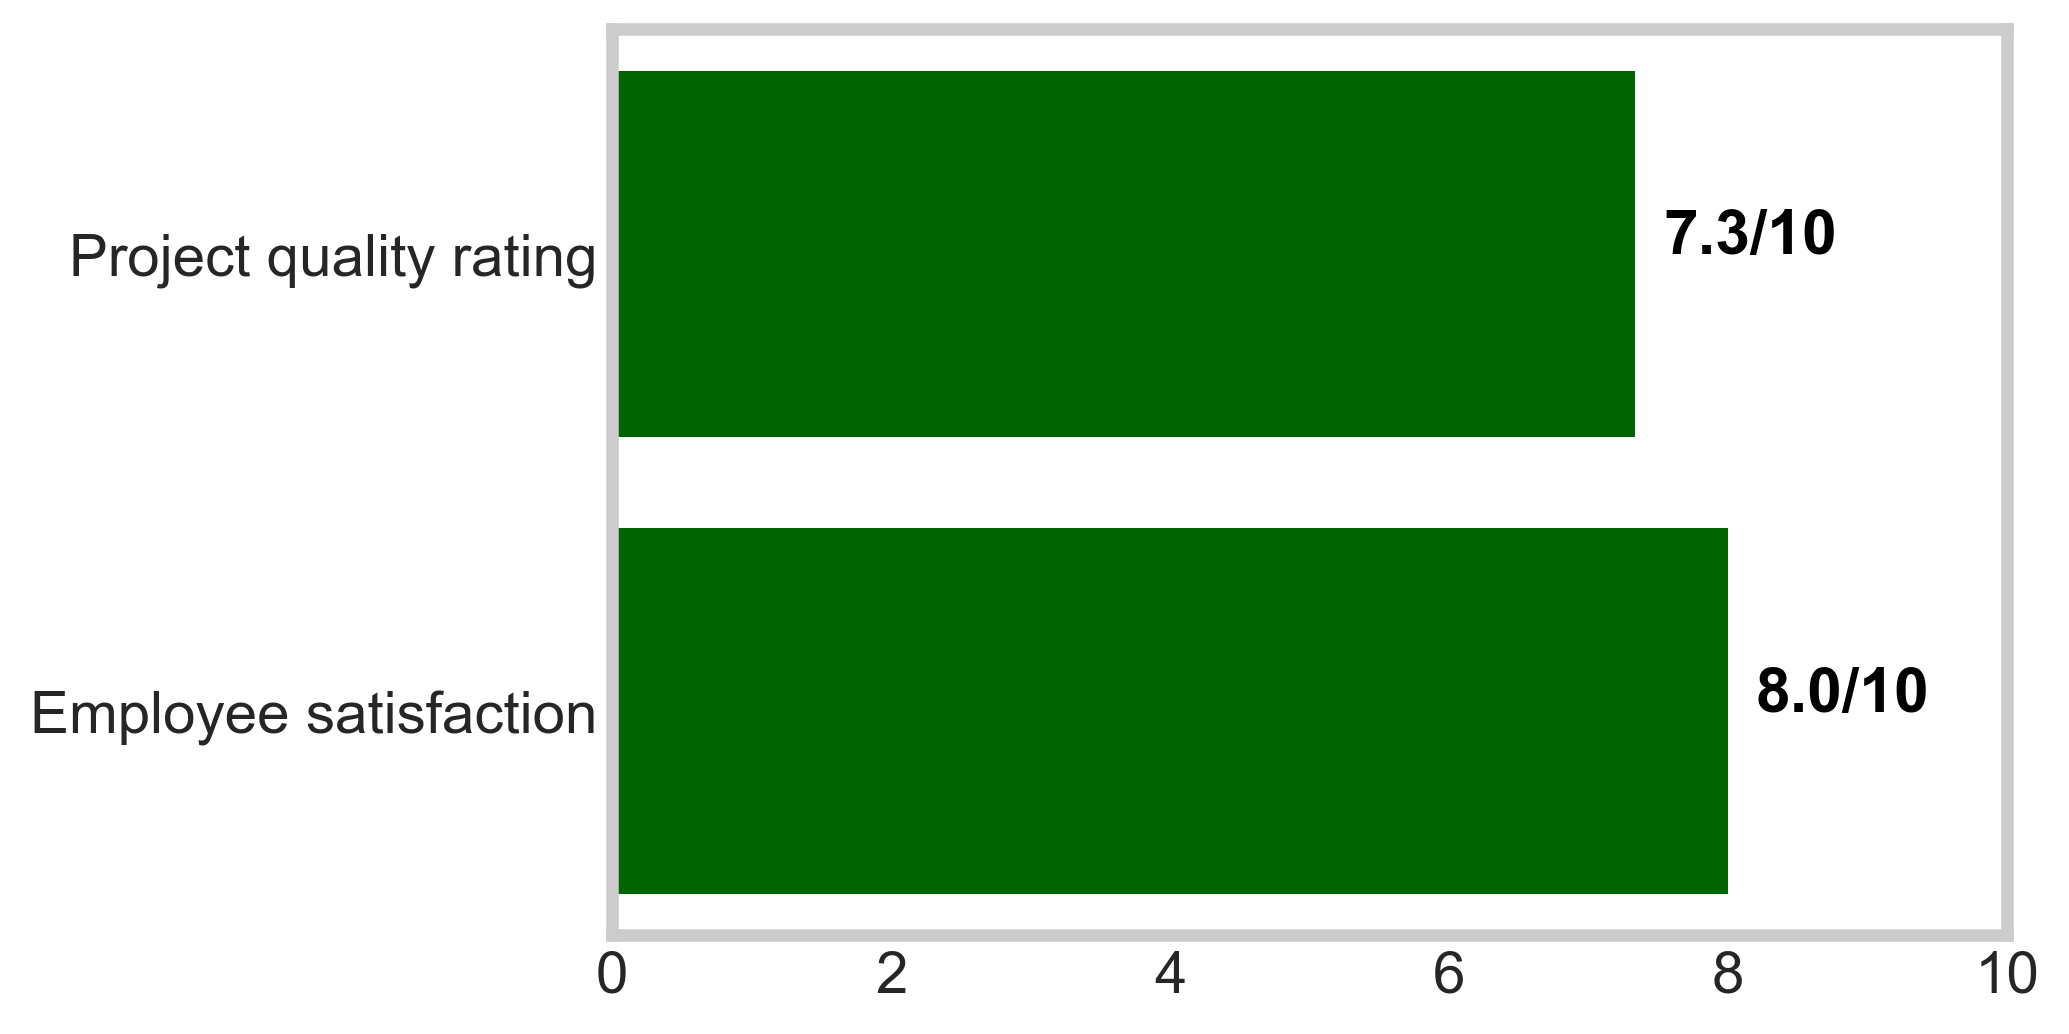

In [88]:
# Average employee satisfaction (mean or median...?)
#average_employee_satisfaction = np.mean(data["Rate working at AtoZ"])
average_employee_satisfaction = np.median(data["Rate working at AtoZ"])

# Average project quality (mean or median...?)
average_project_quality = np.mean(data["Rate project quality"])
#average_project_quality = np.mean(data["Rate project quality"])

# Plot
names = ["Employee satisfaction", "Project quality rating"]
values = [average_employee_satisfaction, average_project_quality]

plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
plt.style.use('seaborn-whitegrid')
plt.barh(names, values, color="darkgreen")
ax.tick_params(labelsize=14)

for i, v in enumerate(values):
    ax.text(v + .2, i, "{:.1f}/10".format(v), color='black', fontweight='bold', fontsize=15)
plt.grid(False)
plt.xlim([0,10])
plt.setp(ax.spines.values(), linewidth=3)

## Have a closer look

<Figure size 2400x1500 with 0 Axes>

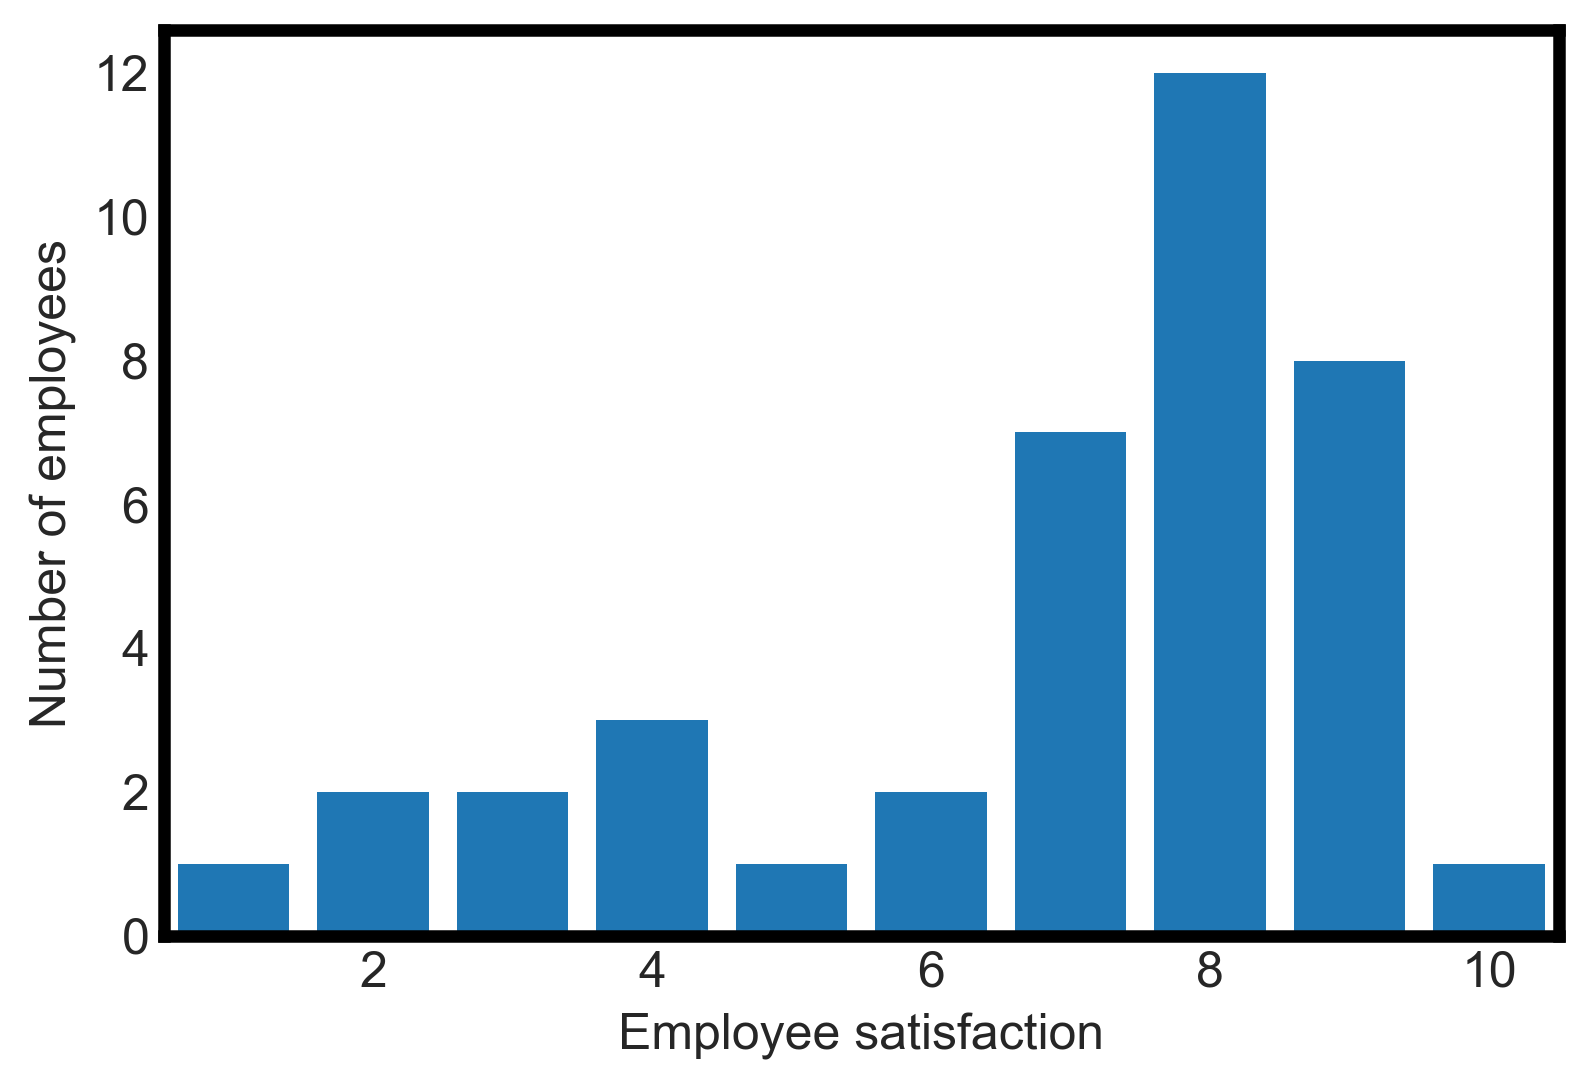

In [89]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
plt.hist(data["Rate working at AtoZ"], np.arange(0,11)+0.5, rwidth=0.8)
plt.grid(False)
plt.xlim([0.5,10.5])
plt.xlabel("Employee satisfaction", fontsize=12)
plt.ylabel("Number of employees", fontsize=12)

plt.setp(ax.spines.values(), linewidth=3, color="black")
ax.tick_params(labelsize=12)

In [90]:
data[data["Rate working at AtoZ"]<6]

,ID,Age,Gender,Joined years ago,Projects,Rate working at AtoZ,Rate project quality
1,2,20-29,female,1-3,"[projectA, projectD]",4,7
3,4,30-39,male,1-3,"[projectA, projectC]",5,8
10,11,30-39,male,1-3,"[projectC, projectE]",2,6
18,19,20-29,female,1-3,"[projectA, projectE]",3,7
21,22,40-49,not provided,1-3,"[projectA, projectC, projectE]",4,7
22,23,20-29,not provided,1-3,[],1,4
26,27,30-39,female,4-8,"[projectA, projectC, projectX]",3,6
27,28,30-39,not provided,1-3,[projectM],4,3
28,29,20-29,not provided,1-3,"[projectE, projectX]",2,6


## Hypothesis 1: Is there an apparent issue related to gender?

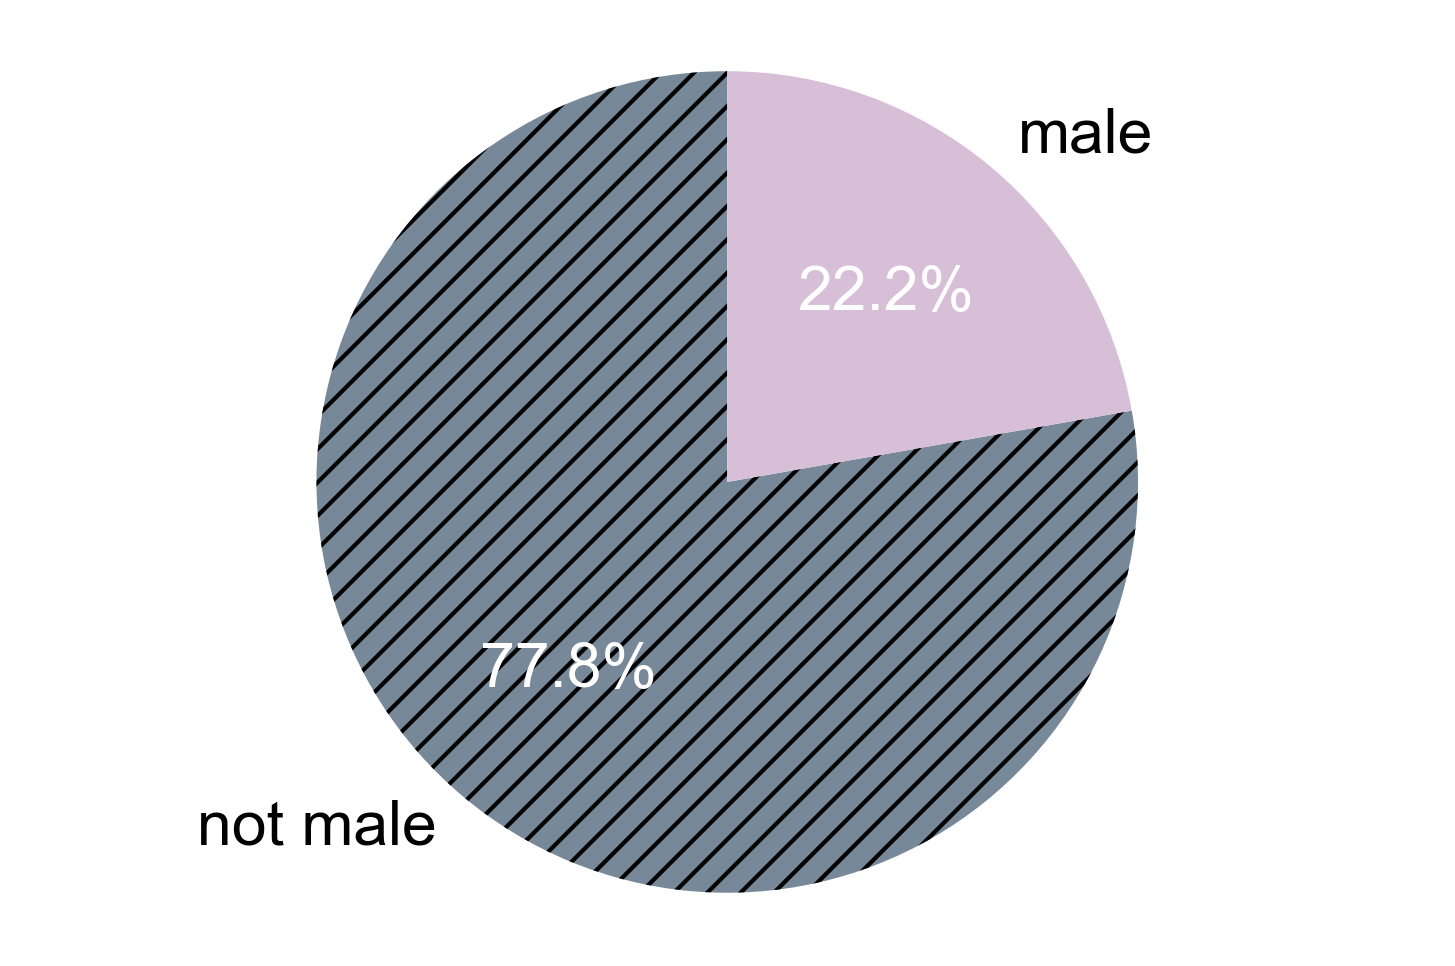

In [91]:
selected_data = pd.Series(data[data["Rate working at AtoZ"]<6]["Gender"]).value_counts()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = list(selected_data.index)
sizes = selected_data.values

# Combine things (that shouldn't be combined!!)
labels_new = ["not male", "male"]
sizes_new = [sizes[labels.index("female")] + sizes[labels.index("not provided")], sizes[labels.index("male")]]

fig1, ax1 = plt.subplots()
pie = ax1.pie(sizes_new, labels=labels_new, autopct='%1.1f%%',
              shadow=False, startangle=90, colors=["lightslategrey", "thistle"],
              textprops={'color':"black", "fontsize": 15})
ax1.axis('equal')
for autotext in pie[2]:
    autotext.set_color('white')
patches = pie[0]
# Add pattern
patches[0].set_hatch('///') 

plt.show()

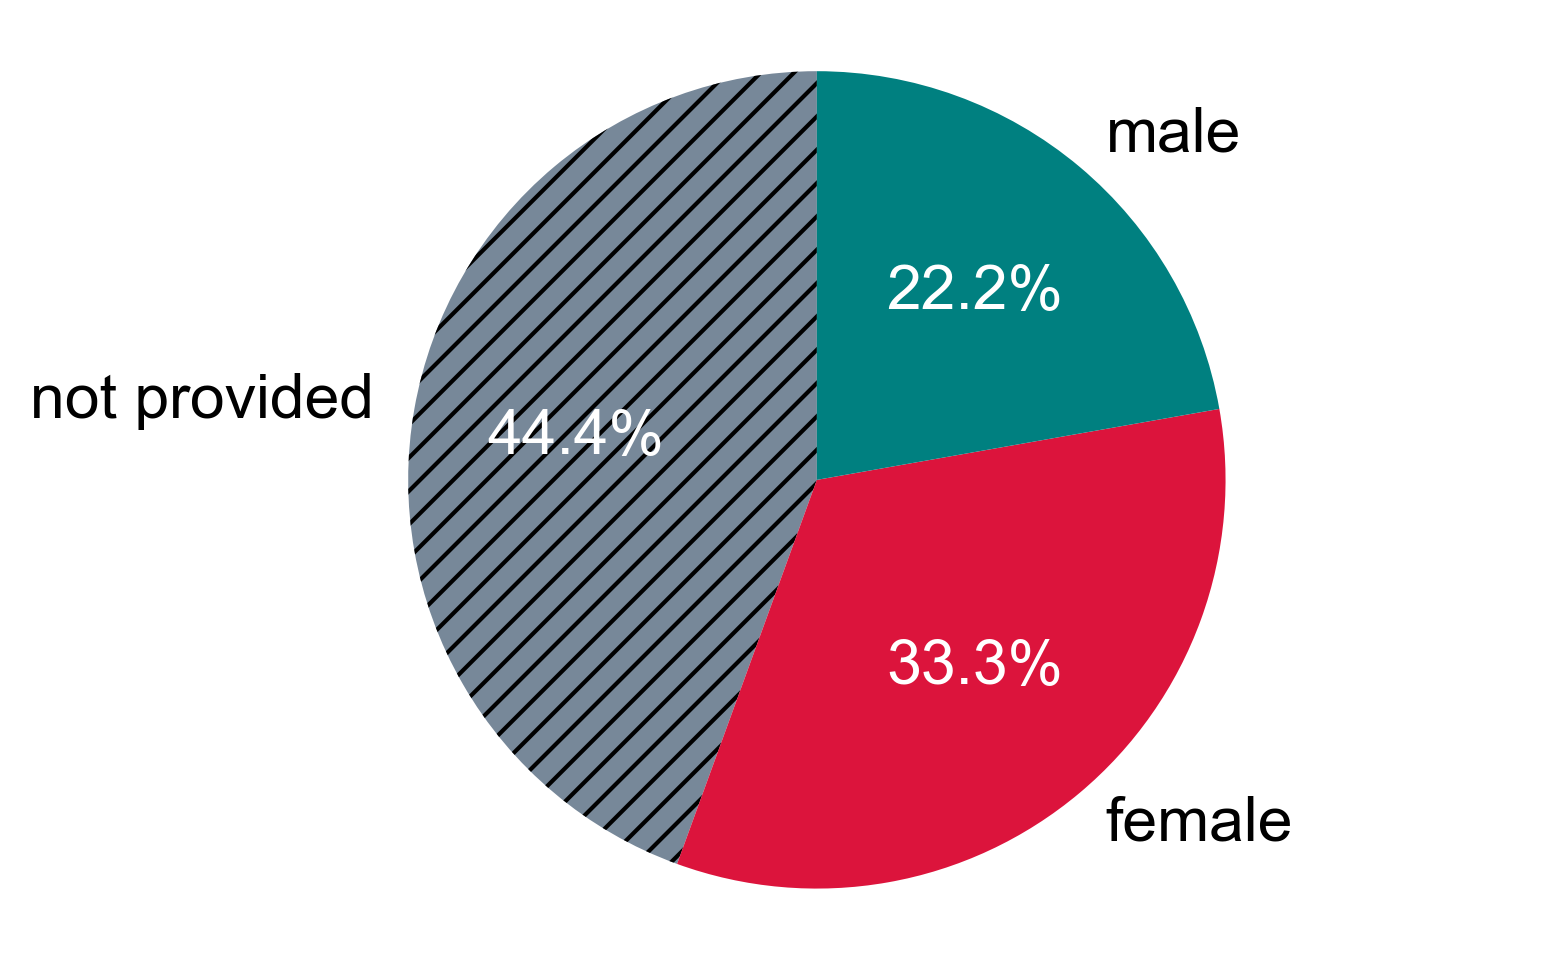

In [92]:
selected_data = pd.Series(data[data["Rate working at AtoZ"]<6]["Gender"]).value_counts()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = list(selected_data.index)
sizes = selected_data.values

fig1, ax1 = plt.subplots()
pie = ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
              shadow=False, startangle=90, colors=["lightslategrey", "crimson", "teal"],
              textprops={'color':"black", "fontsize": 15})
ax1.axis('equal')
for autotext in pie[2]:
    autotext.set_color('white')
patches = pie[0]
# Add pattern
patches[0].set_hatch('///') 

plt.show()

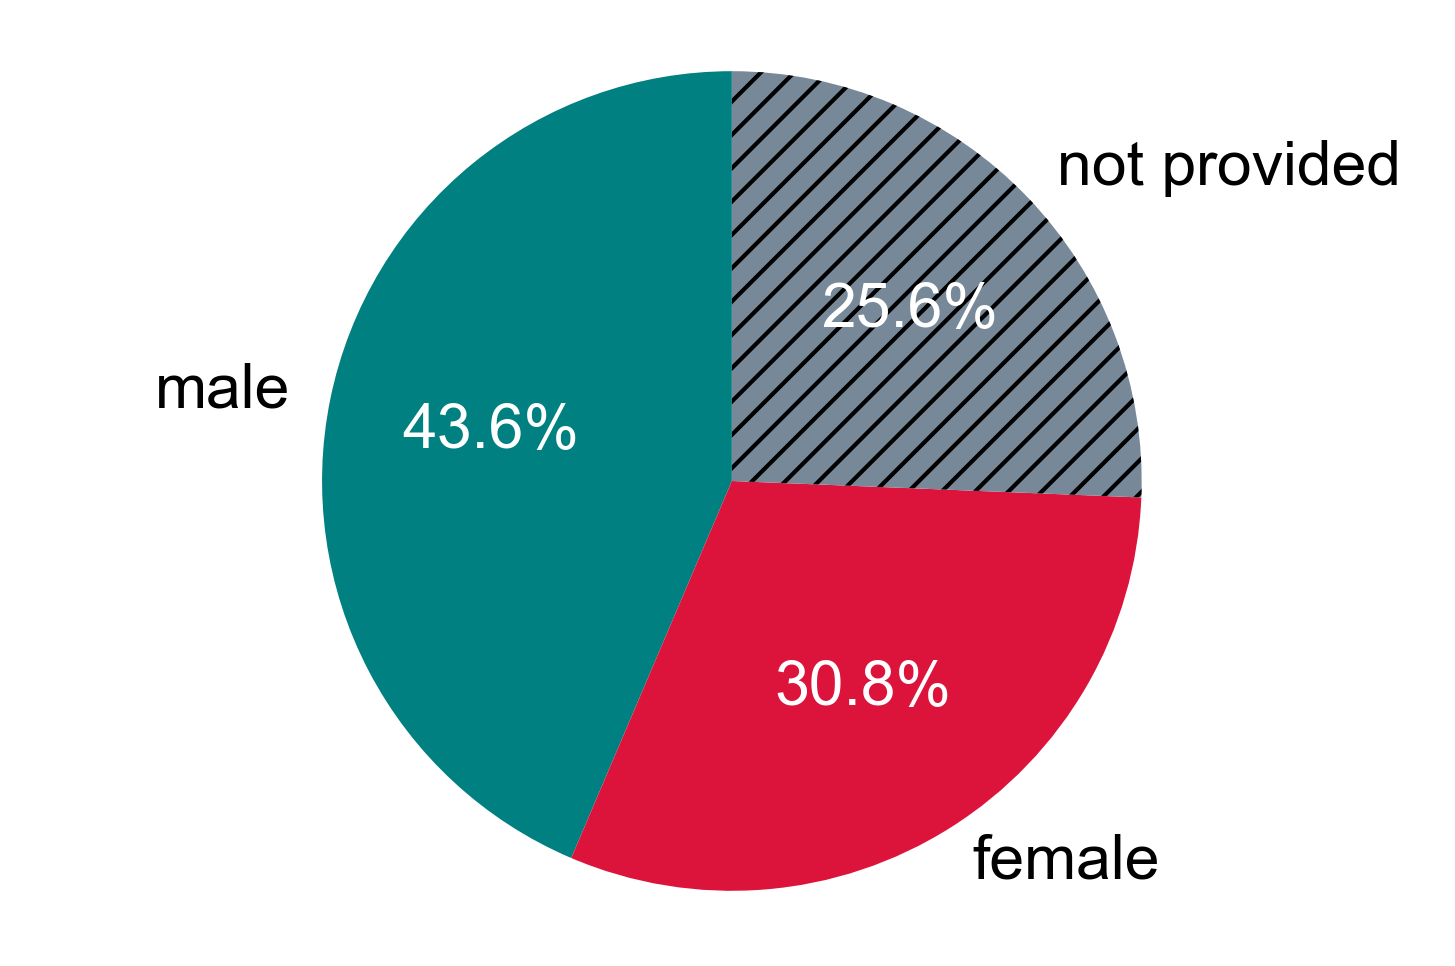

In [93]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = pd.Series(data["Gender"]).value_counts().index
sizes = pd.Series(data["Gender"]).value_counts().values

fig1, ax1 = plt.subplots()
pie = ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
              shadow=False, startangle=90, colors=["teal", "crimson", "lightslategrey"],
              textprops={'color':"black", "fontsize": 15})
ax1.axis('equal')
for autotext in pie[2]:
    autotext.set_color('white')
patches = pie[0]
# Add pattern
patches[2].set_hatch('///') 

plt.show()

## Hypothesis 2: too many/too few projects

In [94]:
def count(listOfTuple):  
    count_map = {} 
    for i in listOfTuple: 
        count_map[i] = count_map.get(i, 0) +1
    return count_map

def plot_proportional_circles(list1, list2, xlabel, ylabel):
    rate_project_pairs = list(zip(list1, list2))
    count_map = count(rate_project_pairs)
    
    plt.figure()
    fig, ax = plt.subplots(figsize=(8,8))
    plt.style.use('seaborn-whitegrid')
    scatter = plt.scatter([x[0] for x in count_map.keys()], [x[1] for x in count_map.keys()],
                s=[300*count_map[x] for x in count_map.keys()], c=[x[1] for x in count_map.keys()], alpha=0.8,
                         cmap="viridis")
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    handles, _ = scatter.legend_elements(prop="sizes", alpha=0.6)
    labels = [1,2,3,4]
    legend2 = ax.legend(handles, labels, loc="center right", fontsize=14)

    plt.setp(ax.spines.values(), linewidth=3, color="black")
    ax.tick_params(labelsize=12)

<Figure size 1800x1200 with 0 Axes>

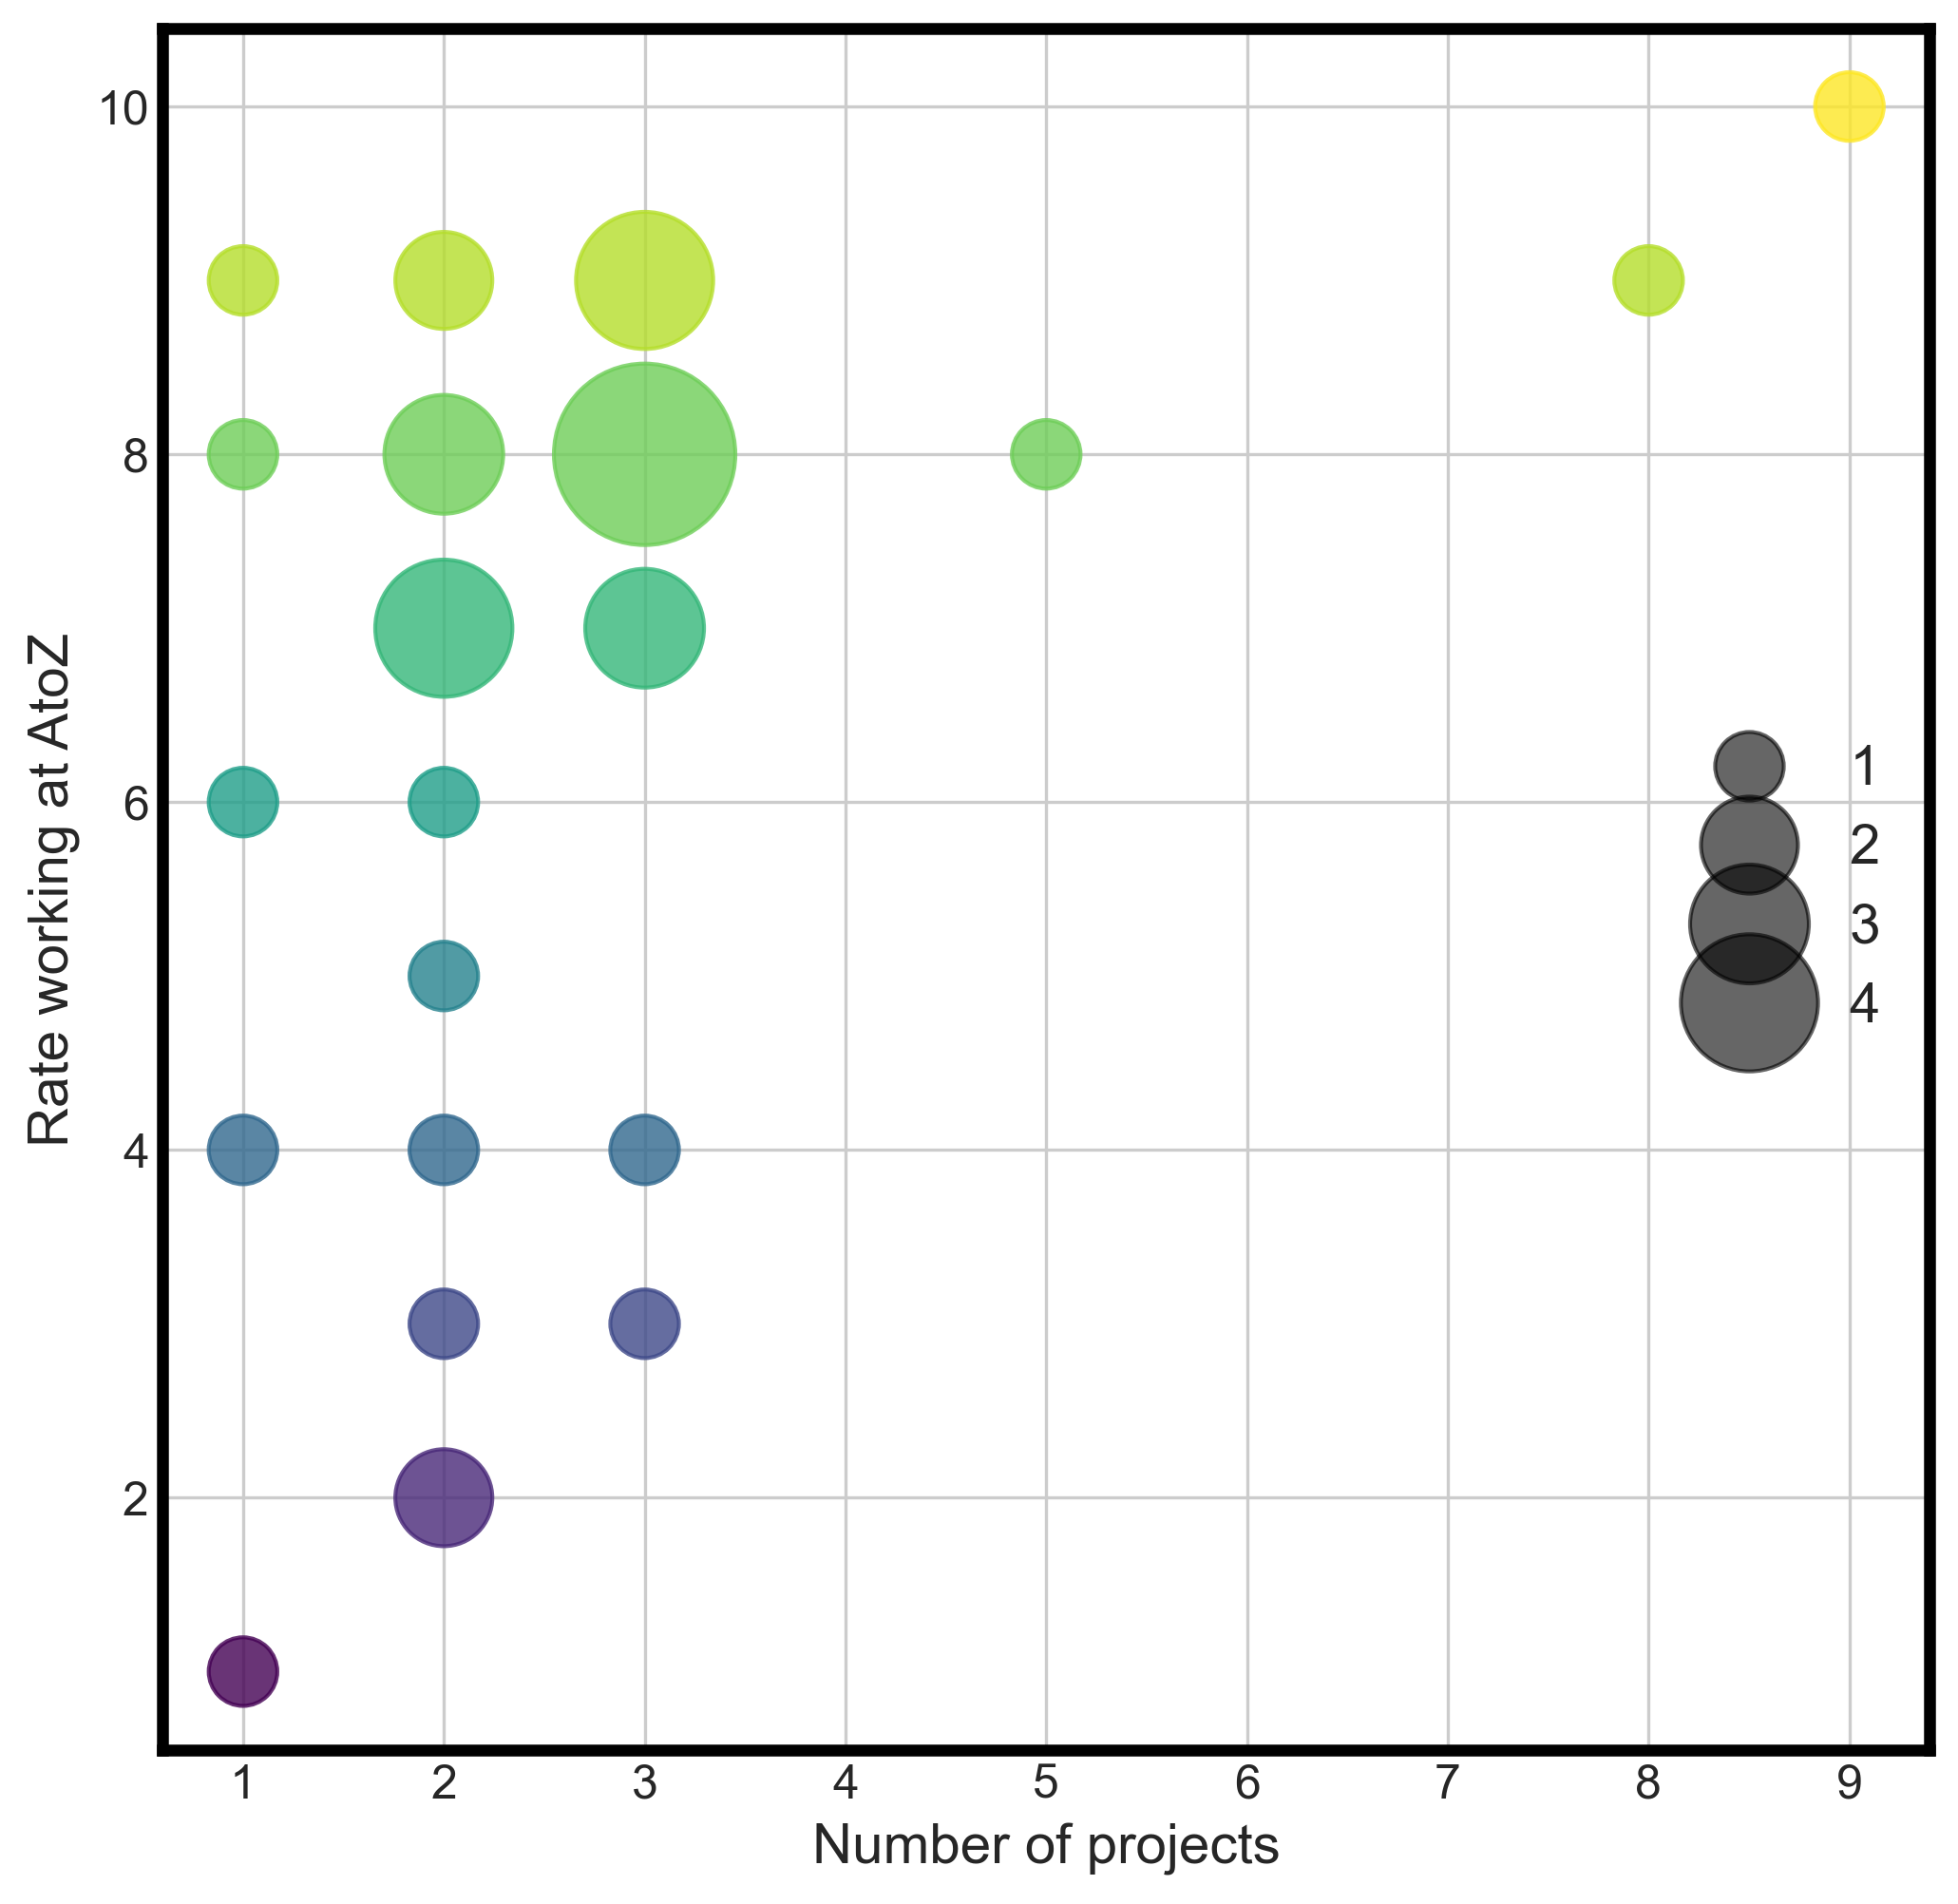

In [95]:
plot_proportional_circles([len(x) for x in data["Projects"]], data["Rate working at AtoZ"],
                         xlabel="Number of projects", ylabel="Rate working at AtoZ")

<Figure size 1800x1200 with 0 Axes>

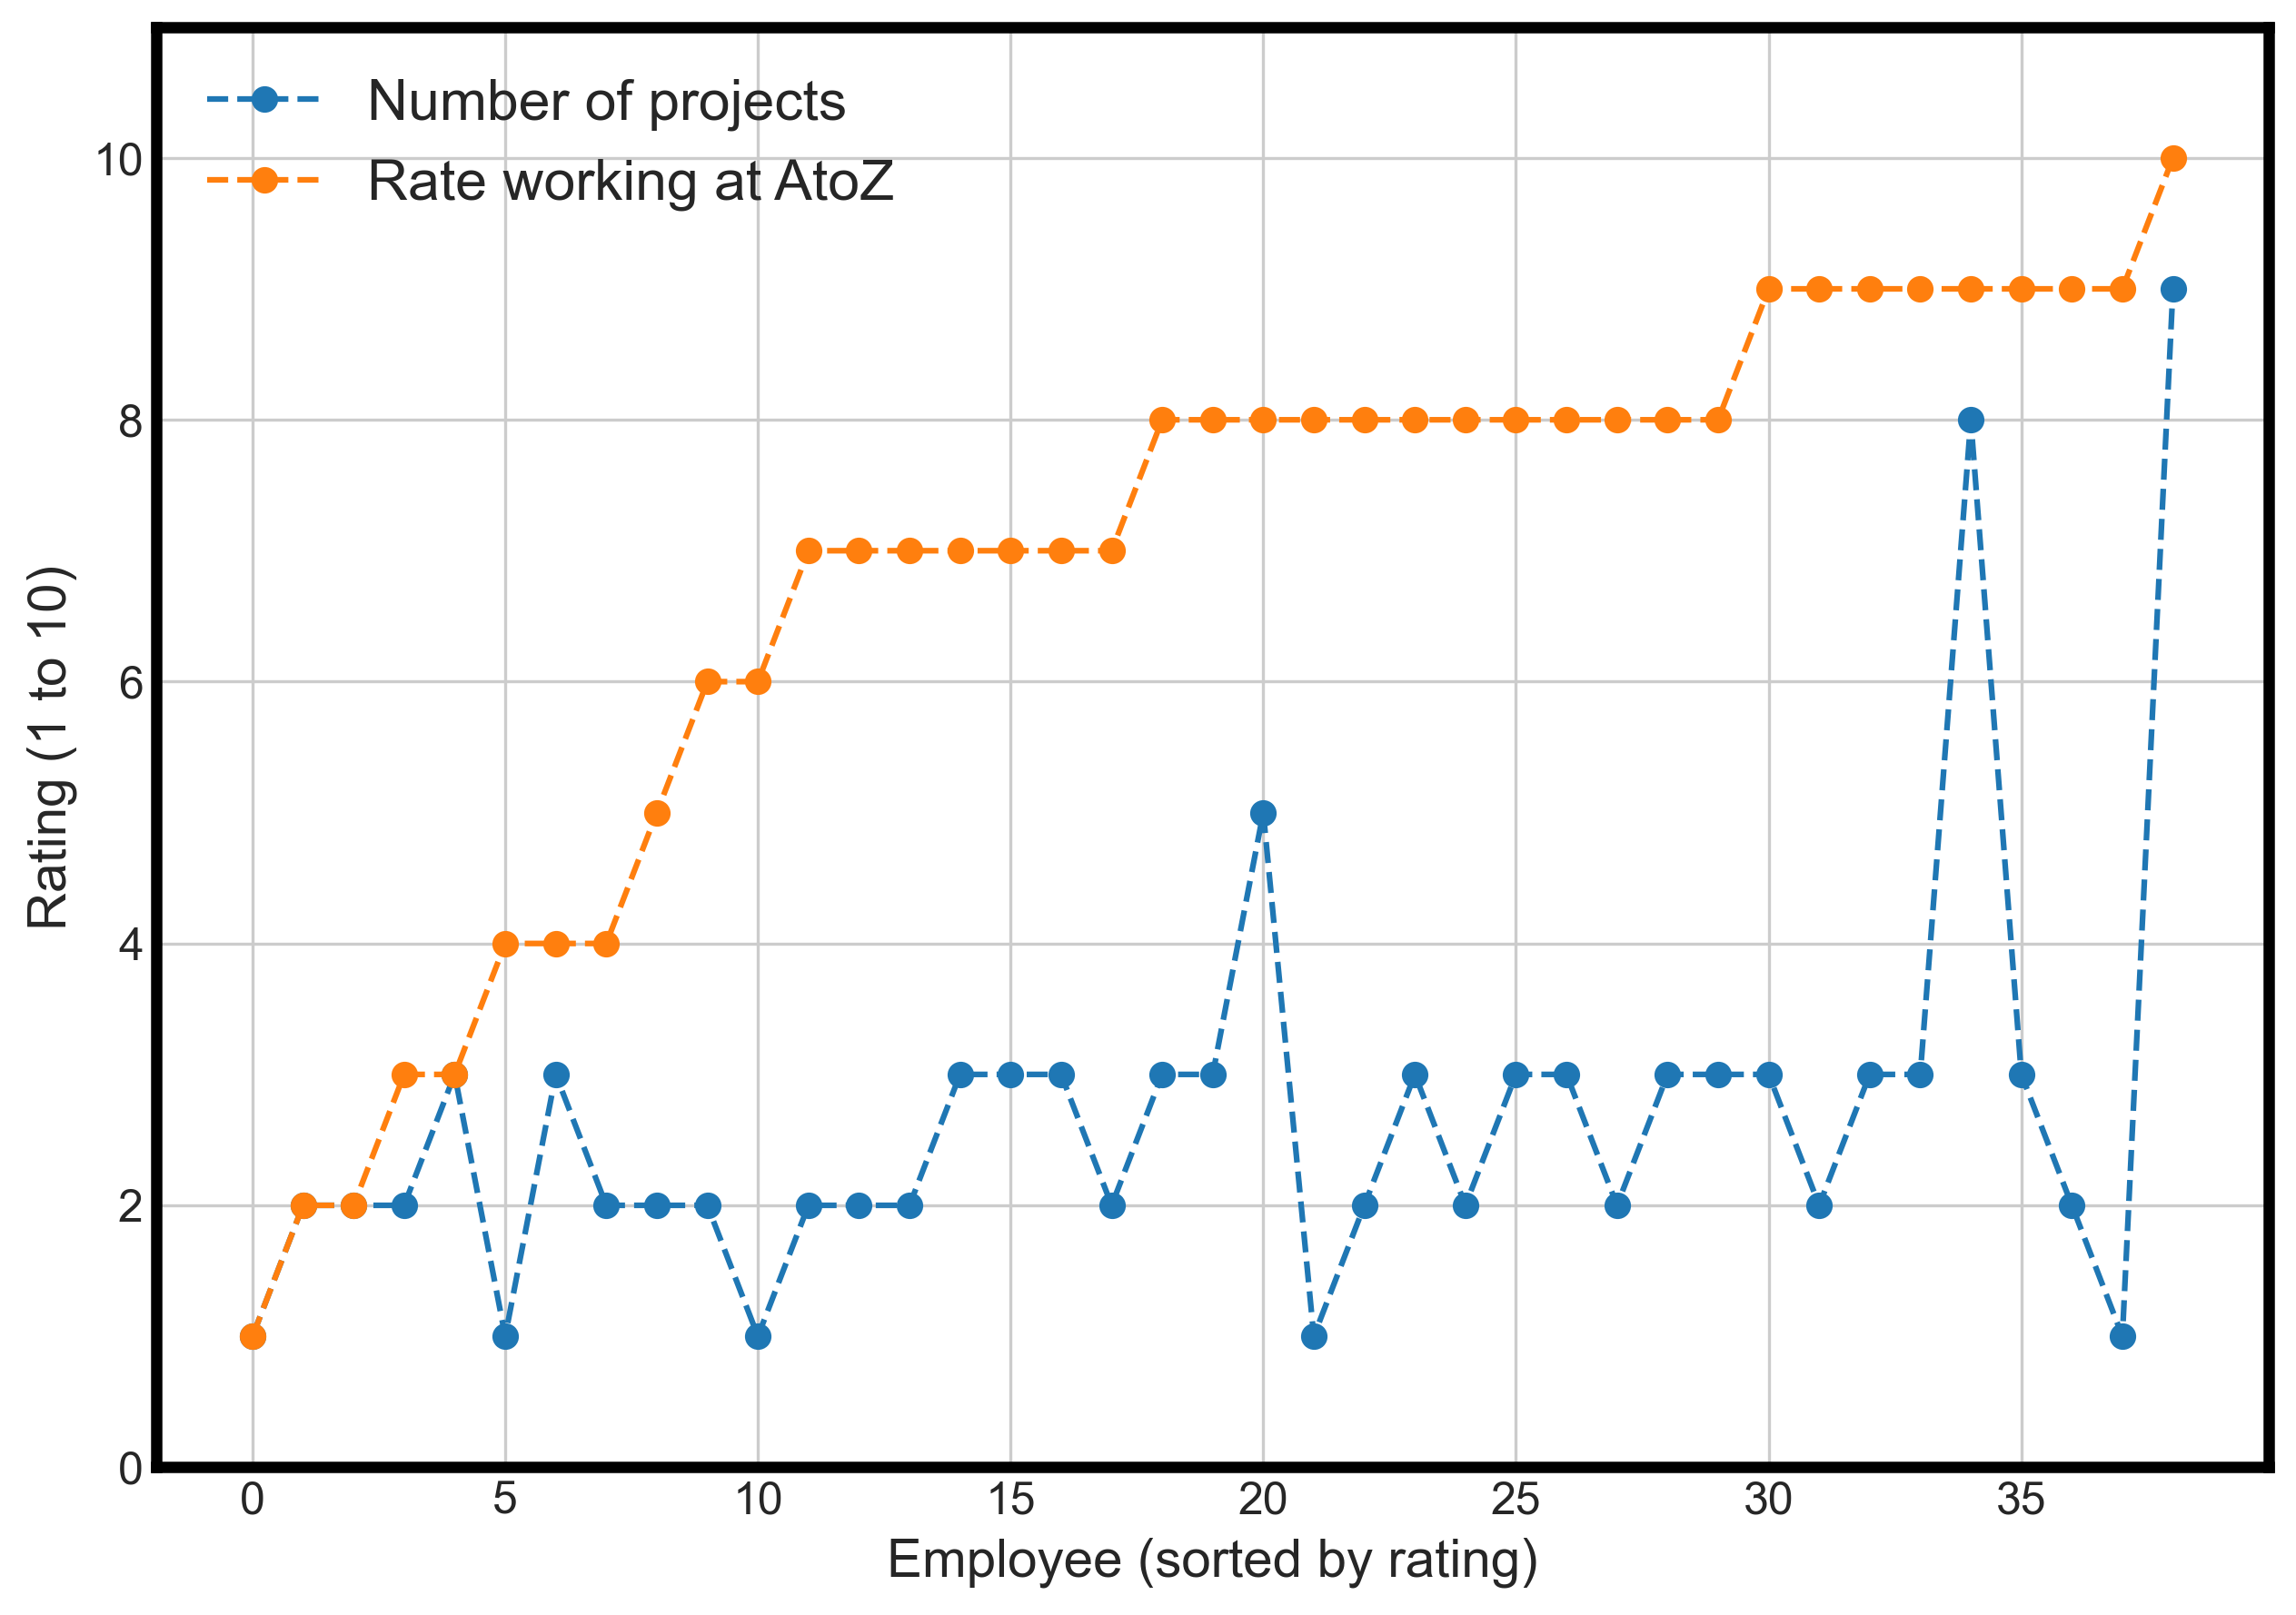

In [96]:
plt.figure()
fig, ax = plt.subplots(figsize=(10,7))
plt.style.use('seaborn-whitegrid')
plt.plot(np.arange(0, len(data)), 
         [len(x) for x in data.sort_values(by=["Rate working at AtoZ"])["Projects"]],
         "o--", label="Number of projects")
plt.plot(np.arange(0, len(data)), 
         data.sort_values(by=["Rate working at AtoZ"])["Rate working at AtoZ"],
         "o--", label="Rate working at AtoZ")
plt.legend(fontsize=15)
plt.ylim([0,11])
plt.xlabel("Employee (sorted by rating)", fontsize=14)
plt.ylabel("Rating (1 to 10)", fontsize=14)

plt.setp(ax.spines.values(), linewidth=3, color="black")
ax.tick_params(labelsize=12)

## Hypothesis 3: Project quality

<Figure size 1800x1200 with 0 Axes>

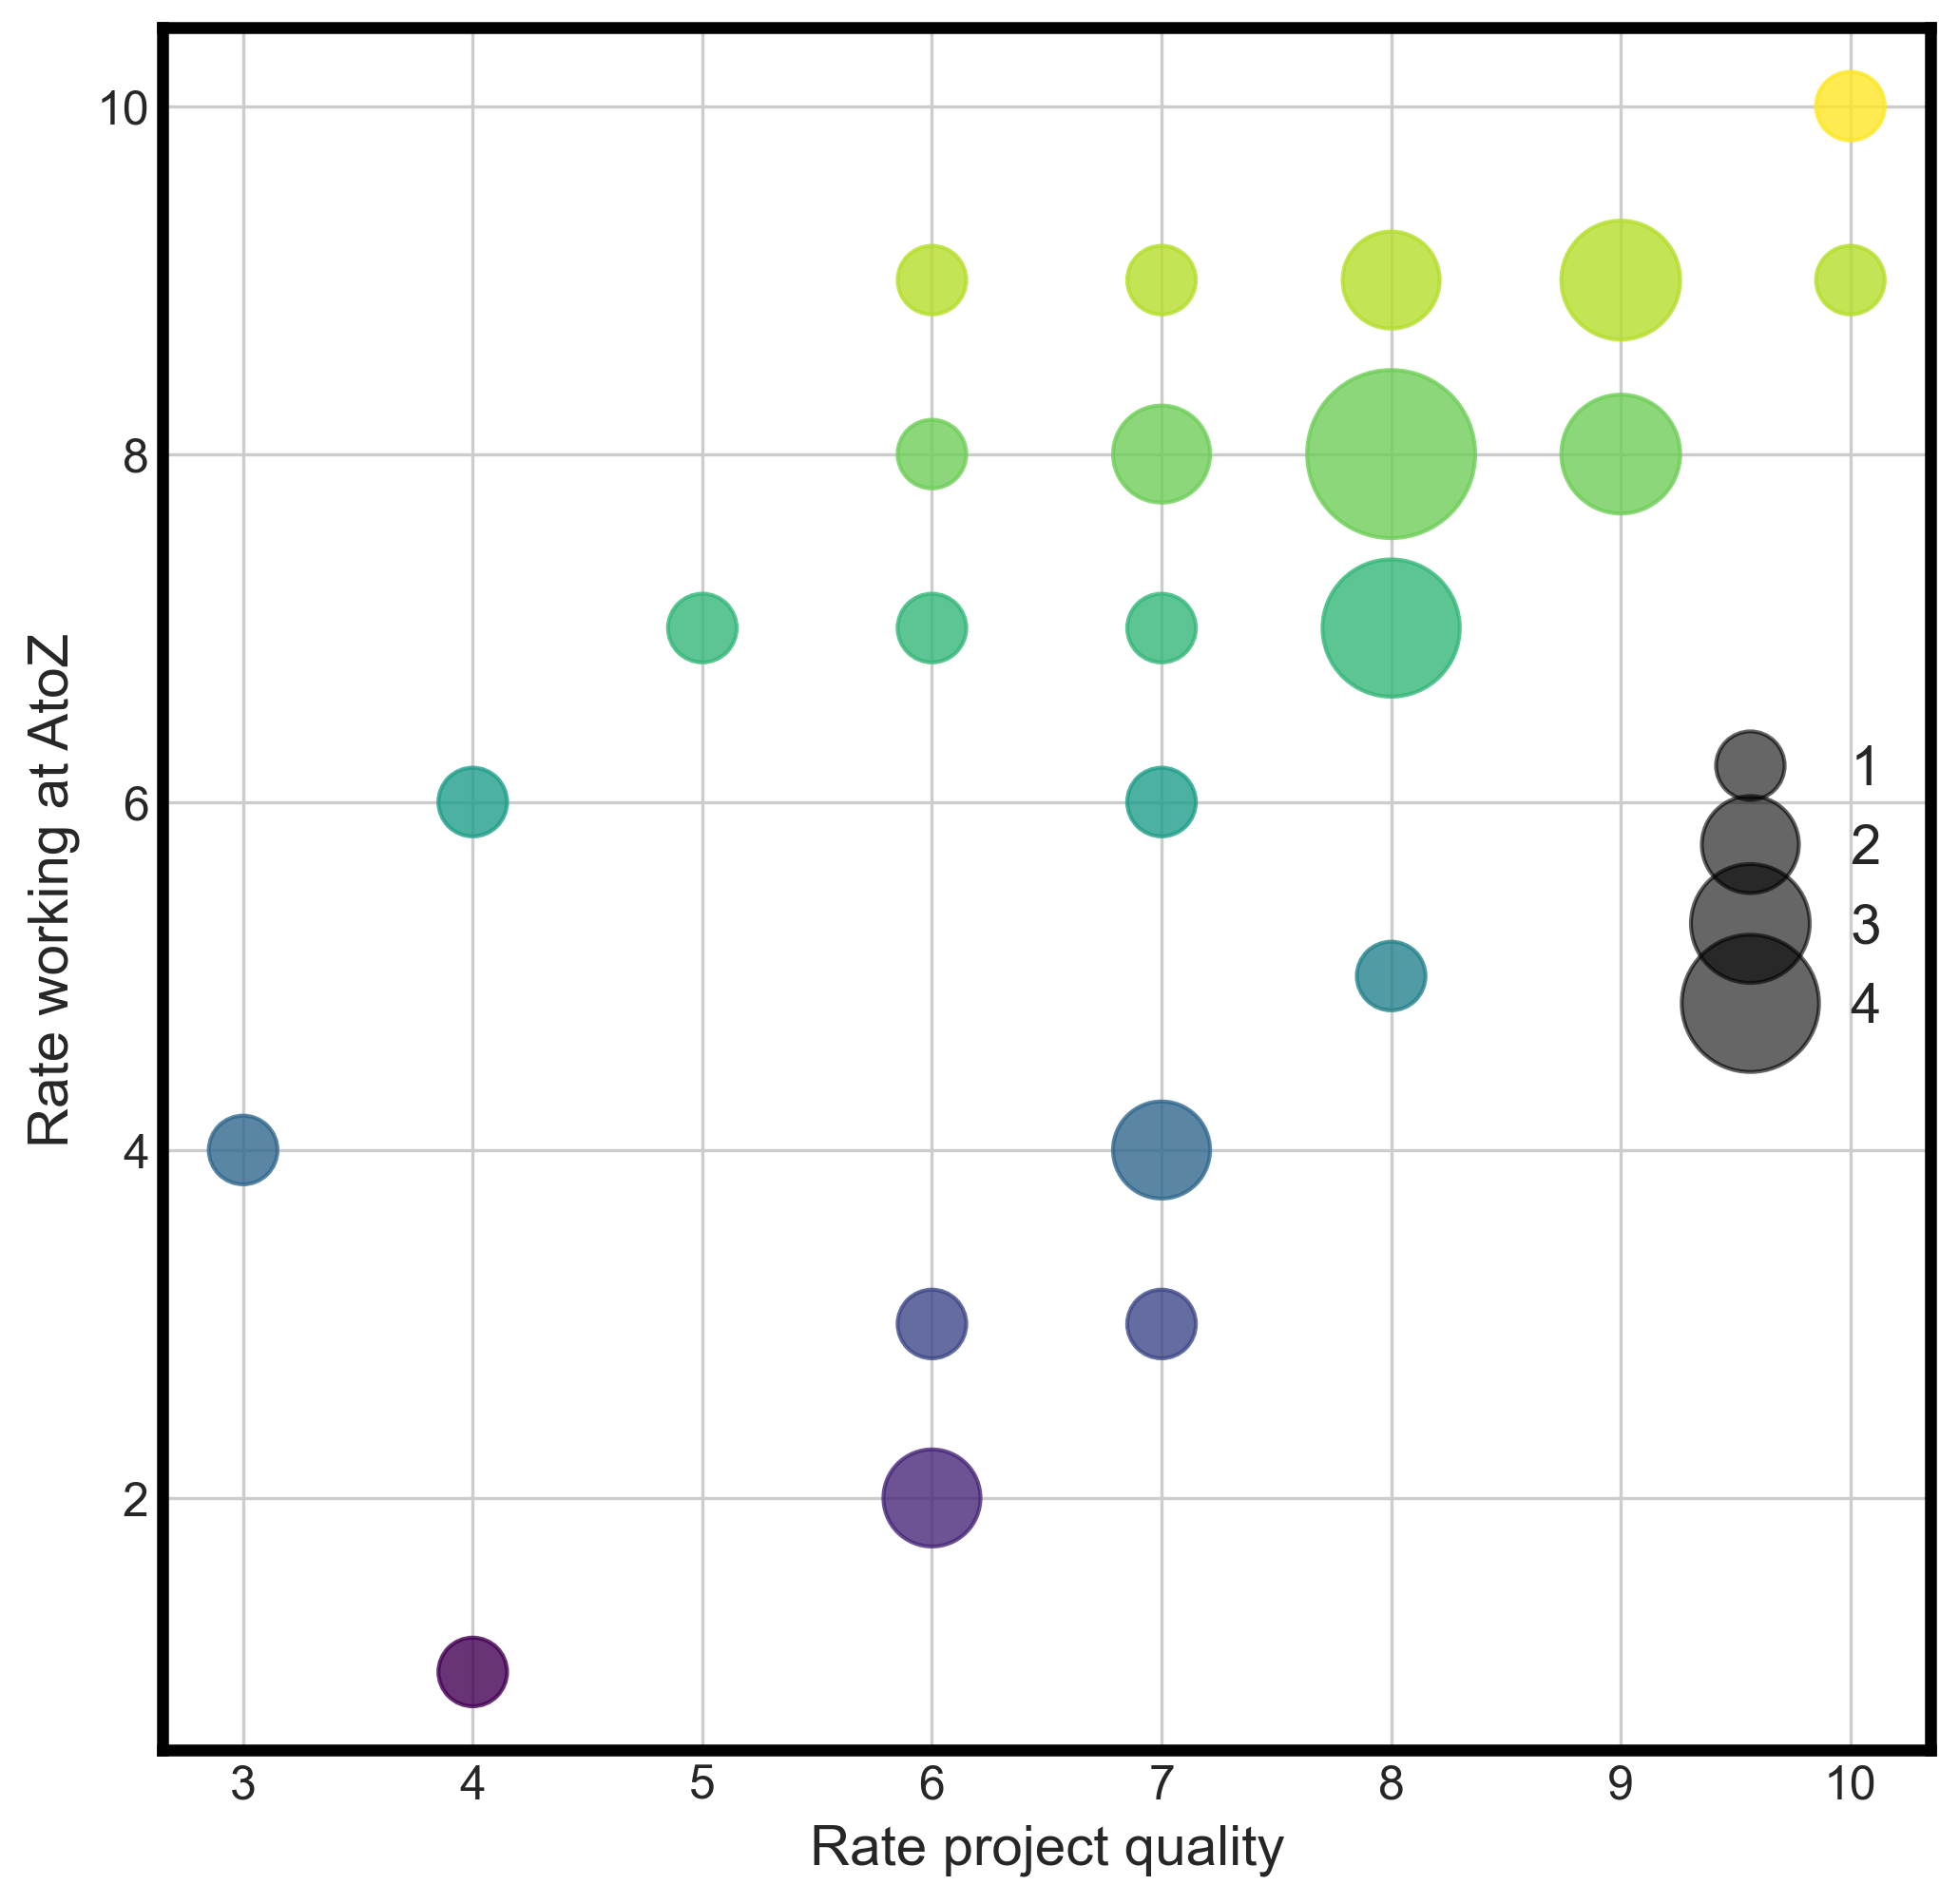

In [97]:
plot_proportional_circles(data["Rate project quality"], data["Rate working at AtoZ"],
                         xlabel="Rate project quality", ylabel="Rate working at AtoZ")

<Figure size 1800x1200 with 0 Axes>

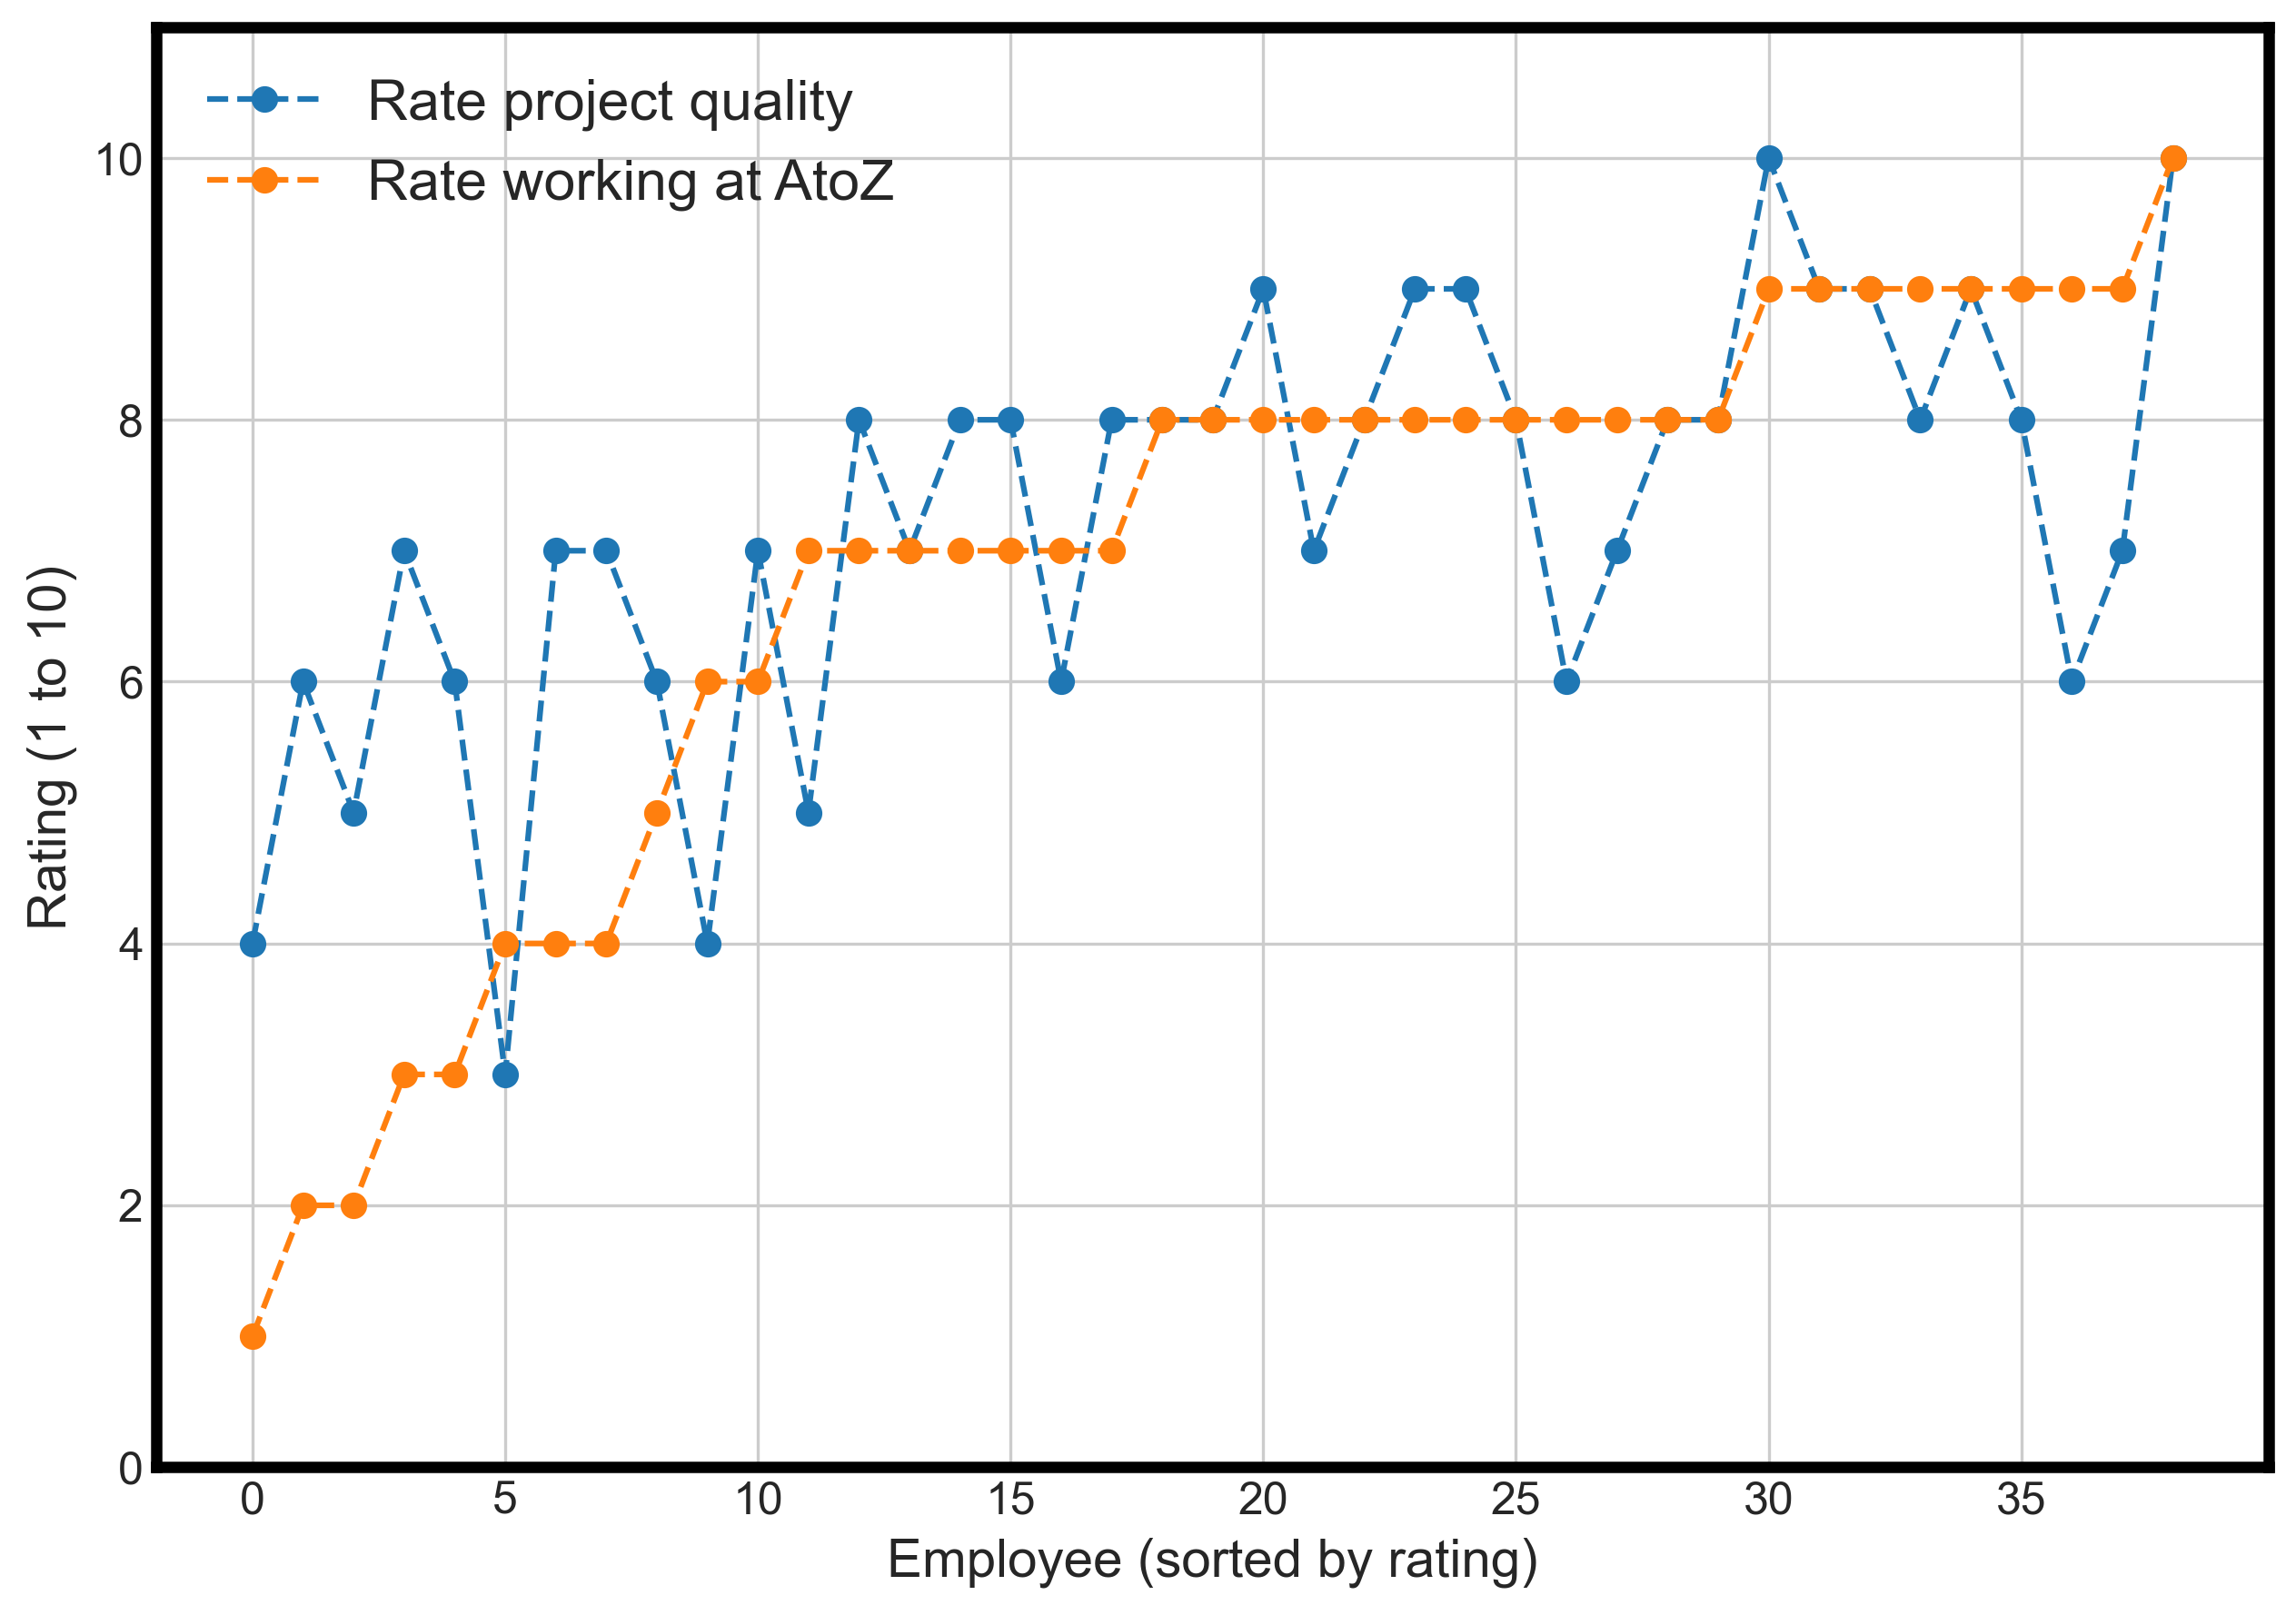

In [62]:
plt.figure()
fig, ax = plt.subplots(figsize=(10,7))
plt.style.use('seaborn-whitegrid')
plt.plot(np.arange(0, len(data)), 
         data.sort_values(by=["Rate working at AtoZ"])["Rate project quality"],
         "o--", label="Rate project quality")
plt.plot(np.arange(0, len(data)), 
         data.sort_values(by=["Rate working at AtoZ"])["Rate working at AtoZ"],
         "o--", label="Rate working at AtoZ")
plt.legend(fontsize=15)
plt.ylim([0,11])
plt.xlabel("Employee (sorted by rating)", fontsize=14)
plt.ylabel("Rating (1 to 10)", fontsize=14)

plt.setp(ax.spines.values(), linewidth=3, color="black")
ax.tick_params(labelsize=12)

<Figure size 1800x1200 with 0 Axes>

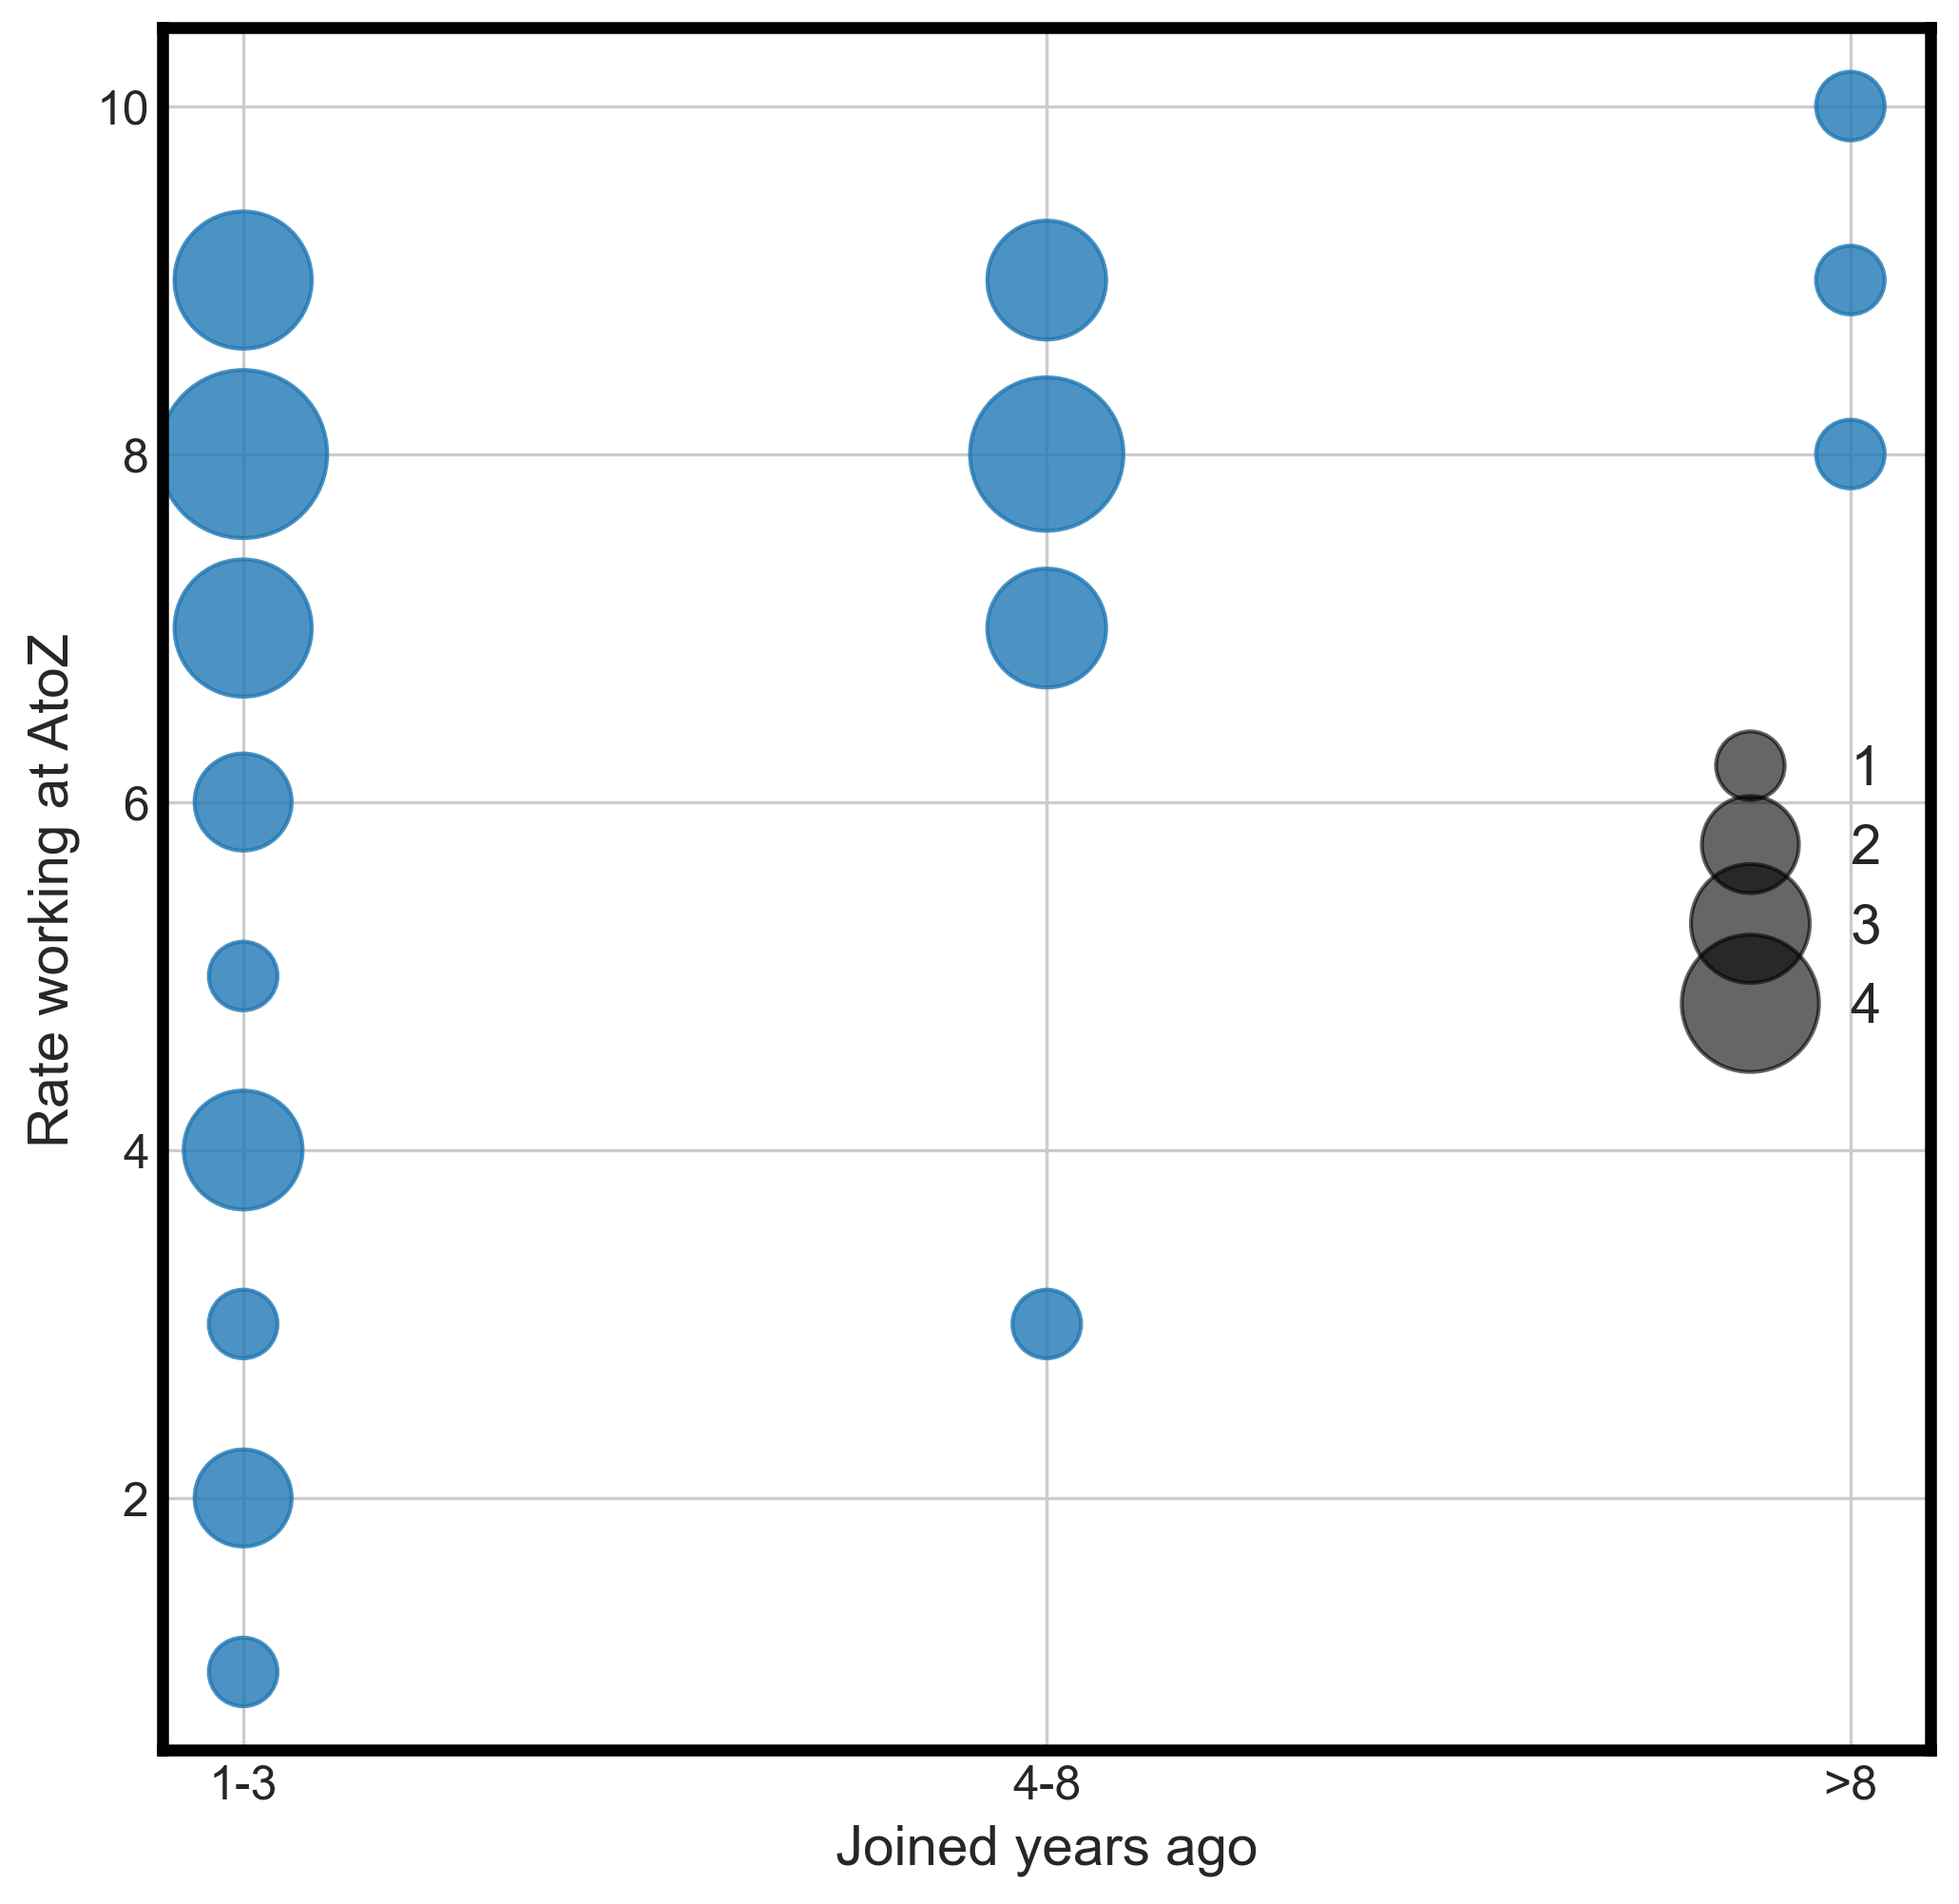

In [63]:
plot_proportional_circles(data["Joined years ago"], data["Rate working at AtoZ"],
                         xlabel="Joined years ago", ylabel="Rate working at AtoZ")

(0.0, 11.0)

<Figure size 1800x1200 with 0 Axes>

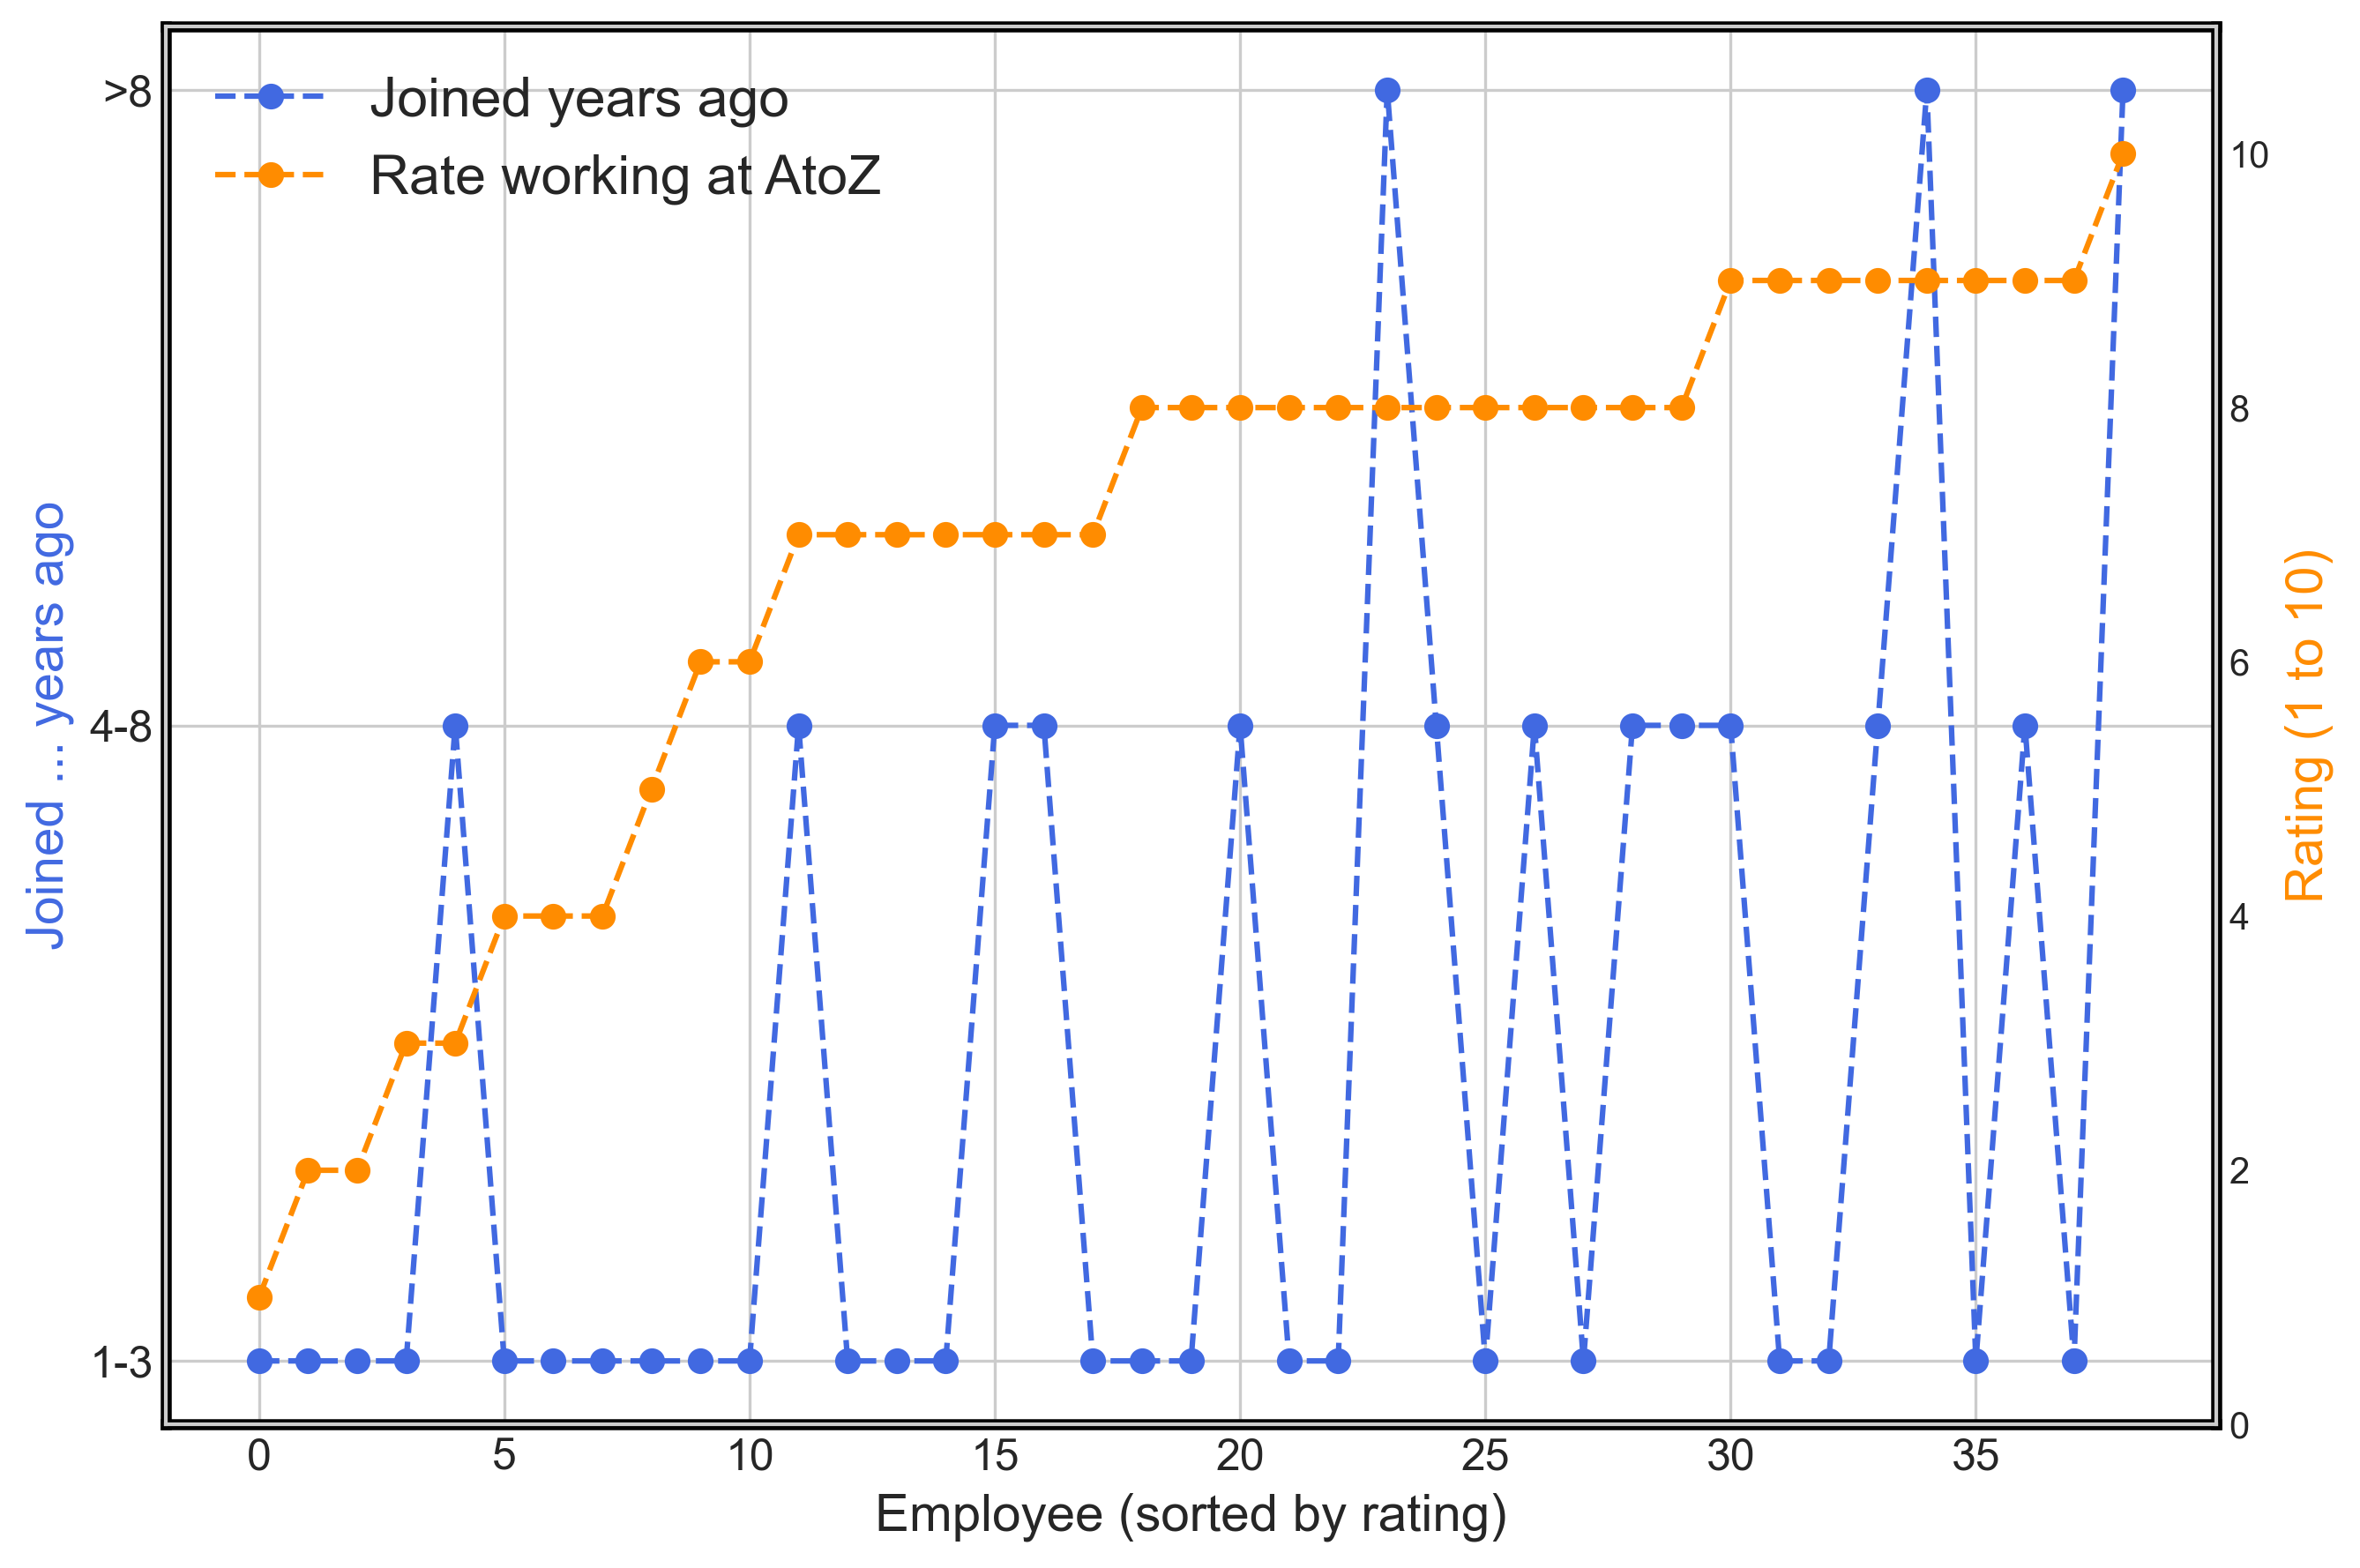

In [64]:
plt.figure()
fig, ax = plt.subplots(figsize=(10,7))
plt.style.use('seaborn-whitegrid')

lns1 = ax.plot(np.arange(0, len(data)), 
         data.sort_values(by=["Rate working at AtoZ"])["Joined years ago"],
         "o--", label="Joined years ago", color="royalblue")

ax2 = ax.twinx()
lns2 = ax2.plot(np.arange(0, len(data)), 
         data.sort_values(by=["Rate working at AtoZ"])["Rate working at AtoZ"],
         "o--", label="Rate working at AtoZ", color="darkorange")
ax.set_ylabel("Joined ... years ago", color="royalblue", fontsize=14)
ax2.set_ylabel("Rating (1 to 10)", color="darkorange", fontsize=14) 

ax2.grid(False)
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc="upper left", fontsize=15)
ax.set_xlabel("Employee (sorted by rating)", fontsize=14)

plt.setp(ax.spines.values(), linewidth=3, color="black")
ax.tick_params(labelsize=12)
plt.ylim([0,11])

## Create network graph (using networkx)

In [65]:
import networkx as nx

In [66]:
G = nx.Graph()

# Add nodes -------------------------------
people_nodes = []
for ID in data["ID"].values:
    if ID not in [23]: #, 6, 15]:
        people_nodes.append(ID)
        G.add_node(ID, bipartite=0)

project_nodes = []
for project in projects_all:
    if project not in [""]:
        G.add_node(project, bipartite=1)

# Add edges -------------------------------
for i, projects in enumerate(data["Projects"].values):
    for project in projects:
        if project not in [""]: # and i not in [5, 14]:
            project_nodes.append(project)
            G.add_edge(data["ID"].values[i], project, color="r", alpha=0.5)

In [68]:
import networkx as nx
from ipycytoscape import CytoscapeWidget

cyto = CytoscapeWidget()
cyto.graph.add_graph_from_networkx(G)
display(cyto)

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'css': {'background-c…

## Create network plot

<Figure size 1800x1200 with 0 Axes>

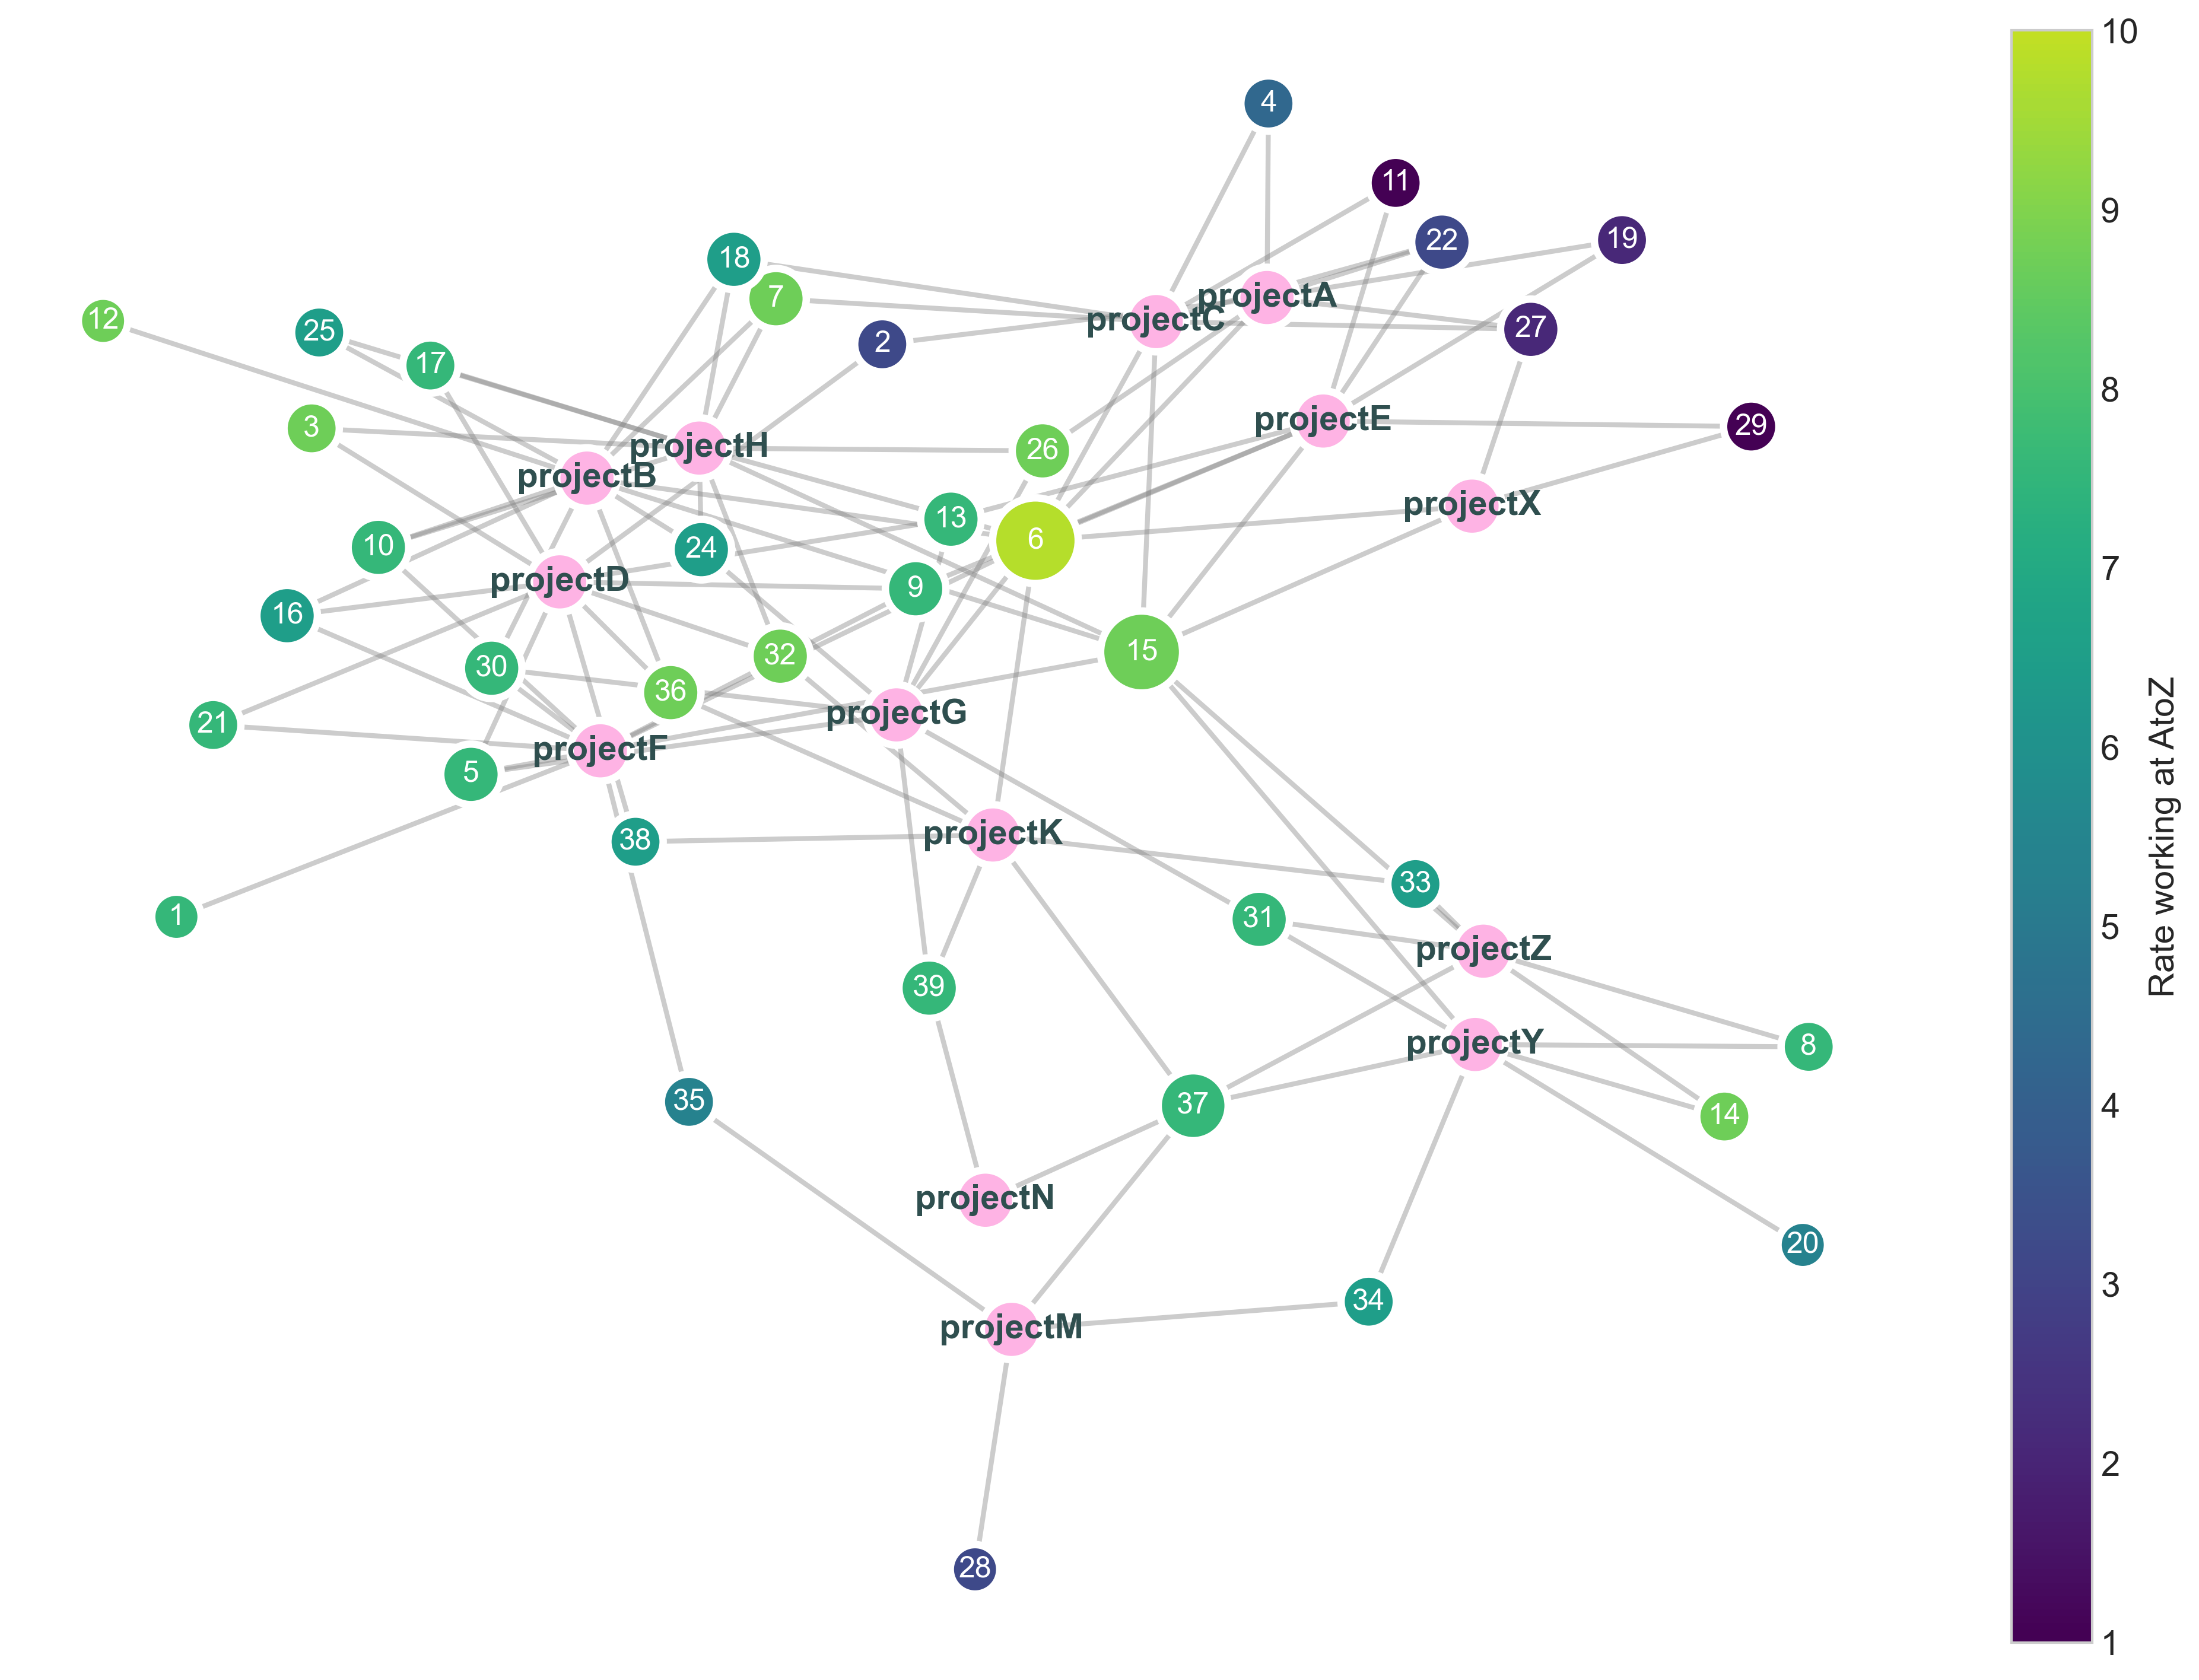

<Figure size 1800x1200 with 0 Axes>

In [109]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

def create_network_plot(label_category, cmap="viridis", k=1, seed=10):
    """Toy function to create a network plot."""
    def _get_colormaps(cmap):
        basemap = cm.get_cmap(cmap, 256)
        newcolors = basemap(np.linspace(0, 1, 256))
        newcolors[-5:, :] = np.array([255/256, 180/256, 229/256, 1])
        newmap = ListedColormap(newcolors)
        return basemap, newmap

    # Create color and size labels
    labels_people = {}    
    labels_projects = {} 
    color_map = []
    node_sizes = []
    for node in G:
        if node in projects_all:
            color_map.append(11)
            node_sizes.append(600)
            labels_projects[node] = node
        else:
            color_map.append(data[data["ID"] == node][label_category].values)
            node_sizes.append(100 * (len(data[data["ID"] == node]["Projects"].values[0]) + 3))
            labels_people[node] = node

    # Compute network node positions
    pos = nx.spring_layout(G, k=k, iterations=1000, seed=seed)

    # Create figure
    basemap, newmap = __get_colormaps(cmap)
    plt.figure()
    fig, ax = plt.subplots(figsize=(17,12))
    nodes = nx.draw_networkx_nodes(G, pos=pos, node_color=color_map, node_size=node_sizes,
                                   cmap=newcmp, linewidths=3)
    nodes.set_edgecolor('w')
    nx.draw_networkx_labels(G, pos=pos, labels=labels_people, font_color="white")
    nx.draw_networkx_labels(G, pos=pos, labels=labels_projects, font_color="darkslategrey",
                            font_size=14, font_weight="bold")
    nx.draw_networkx_edges(G, pos=pos, edge_color="gray", width=2, alpha=0.4, style="-")

    # Add colorbar
    vmin = min(data[label_category].values)
    vmax = max(data[label_category].values)
    sm = plt.cm.ScalarMappable(cmap=ListedColormap(basemap(np.linspace(0, 10/11, 240))),
                                                   norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = plt.colorbar(sm)
    cbar.set_label(label_category, rotation=90, fontsize=14)
    cbar.ax.tick_params(labelsize=14)
    
    # Some more cosmetics
    plt.grid(False)
    plt.setp(ax.spines.values(), linewidth=0, color="black")
    plt.show()


create_network_plot("Rate working at AtoZ", k=0.1, seed=15)
plt.savefig("A_to_Z_network.pdf")

<Figure size 1800x1200 with 0 Axes>

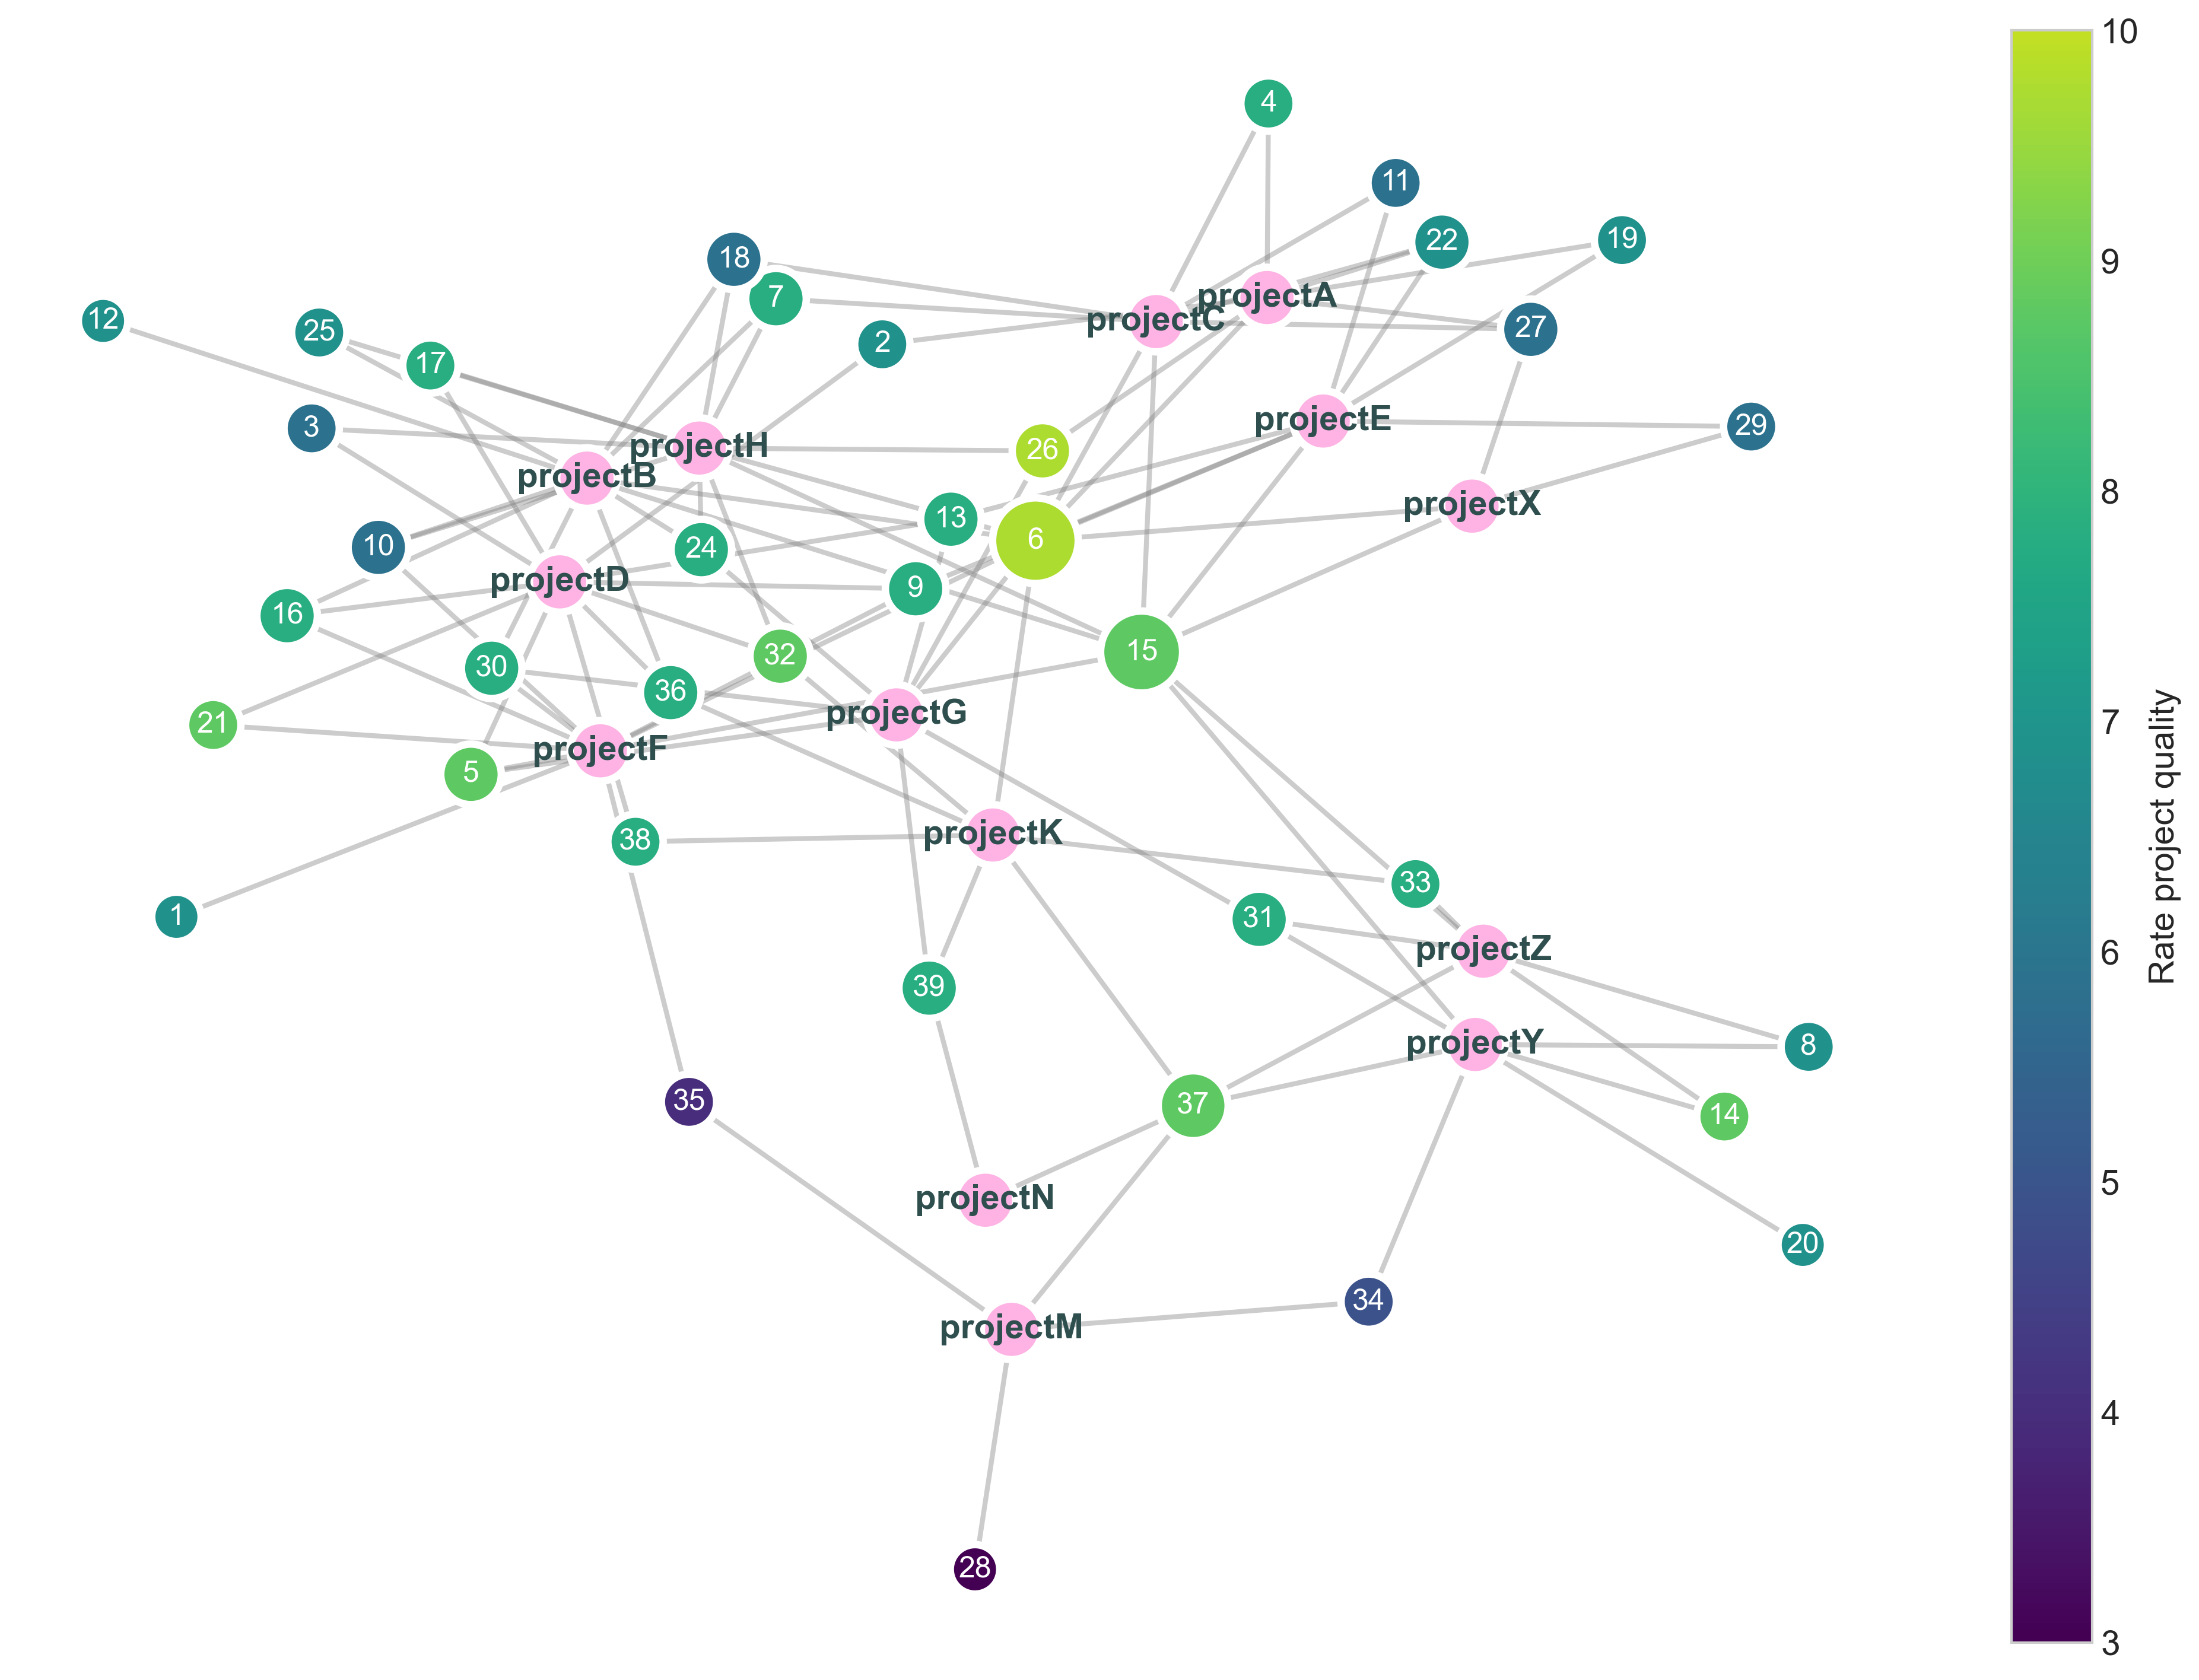

<Figure size 1800x1200 with 0 Axes>

In [110]:
create_network_plot("Rate project quality", k=0.1, seed=15)

---

# Conclusions --> Storytelling

Now that we have explored multiple hypothesis, we can start drawing our conclusions. The network plot seems to suggest that most unsatisfied emplyees are part of two groups. The larger group (4, 11, 19, 22, 27, 29) works on the same 4 projects (``projectA``, ``projectC``, ``projectE``, and ``projectX``). Here the data suggests that their issue is not primarily with the quality of the projects (which is rated rather OK), nor is it clearly related to gender or the number of projects per person. But from the network plot is is apparent that this group is somewhat detached from the main bulk of people. There are less links between those 4 projects and the rest of the projects, in particular since half of the connections go via 6 and 15 which seem to be the two senior people in the organization. 
The data obviously does not allow to fully pinpoint the issue at hand, but hypothesis to explore in further discussions with the respective employees could be: "personal conflicts among this group of people?" or "feel of detachment from rest of company?".

There is an additional group of people on the unhappier side of things which all work on ``projectM``. In that case, however, it correlates with poor ratings for that particular project making this a likely source of frustration. In addition, 28, 34, 35 seem less linked to other company members.

# Other network ploting tools...

In [70]:
from pyvis.network import Network
import pandas as pd

AtoZ = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# set the physics layout of the network
AtoZ.barnes_hut()
AtoZ_data = pd.read_csv("https://www.macalester.edu/~abeverid/data/stormofswords.csv")

colors = ["green", "green", "green", "green", "green", "yellow", "yellow", "yellow", "yellow", "yellow", "yellow"]

people_nodes = []
for ID in data["ID"].values:
    if ID not in [23]:
        people_nodes.append(ID)
        rating = data[data["ID"] == ID]["Rate working at AtoZ"].values[0]
        AtoZ.add_node(str(ID), str(ID), title=str(ID), color=colors[rating], value=1000, size=10000)

project_nodes = []
for project in projects_all:
    if project not in [""]:
        AtoZ.add_node(project, project, title=project, shape="square", color="crimson")

for i, projects in enumerate(data["Projects"].values):
    for project in projects:
        if project not in [""]:
            project_nodes.append(project)
            AtoZ.add_edge(str(data["ID"].values[i]), project, value=1, color="white")

neighbor_map = AtoZ.get_adj_list()

# add neighbor data to node hover data
for node in AtoZ.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    #node["value"] = len(neighbor_map[node["id"]])

AtoZ.show("AtoZ_network.html")

In [127]:
colors = np.array([float(x) for x in color_map])
colors[colors > 10] = 11
colorlst = ["teal", "teal", "teal", "teal", "darkgreen", "darkgreen", "darkgreen", "darkgreen", "green", "lightgreen", "pink"]
colors = [colorlst[int(i-1)] for i in colors]

In [168]:
# modify colormap
basemap = cm.get_cmap('viridis', 256)#'viridis', 256)
newcolors = basemap(np.linspace(0, 1, 256))
projectcolor = np.array([255/256, 180/256, 229/256, 1])#np.array([248/256, 24/256, 148/256, 1])
newcolors[-5:, :] = projectcolor
newcmp = ListedColormap(newcolors)

import plotly.graph_objects as go

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        #colorscale='plotly3',#["crimson", "lightgreen", "teal"],#'YlGnBu',
        reversescale=True,
        color=colors,#colors,
        size=10,
        colorbar=dict(
            thickness=15,
            title='Rate working at AtoZ',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    #node_text.append('# of projects: '+str(len(adjacencies[1])))
    node_text.append(list(G.nodes)[node])

#node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [159]:
list(G.nodes)[node]


'projectC'

In [163]:
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [67]:
from pyvis.network import Network
import pandas as pd

got_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# set the physics layout of the network
got_net.barnes_hut()
got_data = pd.read_csv("https://www.macalester.edu/~abeverid/data/stormofswords.csv")

sources = got_data['Source']
targets = got_data['Target']
weights = got_data['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

got_net.show("gameofthrones.html")